---
# Case Study : Telecom Churn Case Study

---

### Problem Statement 
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.o reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
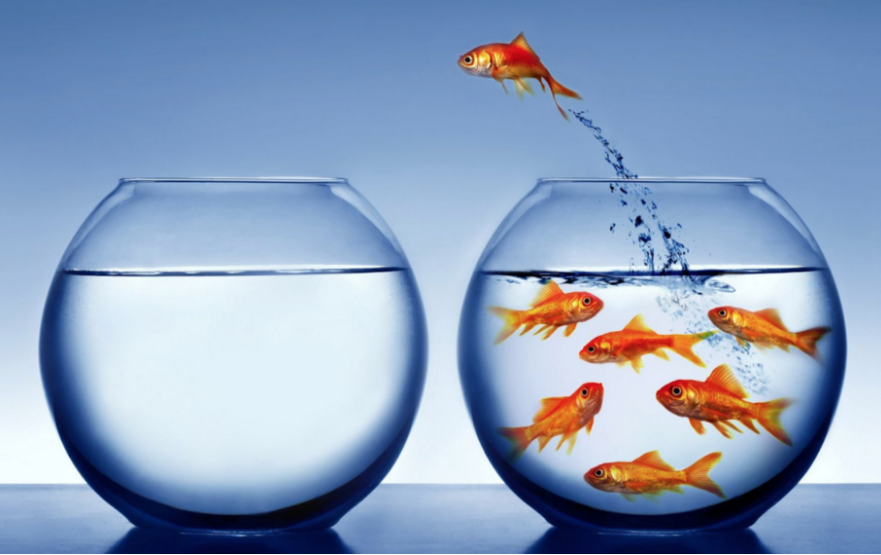

### Business Goal
In this project, the business objective is 
1. To predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.
2. Identify the main indicators of churn.

---

---
### Below are the high level Steps -
    1. Data Understanding
    2. Preprocess data
        i. Handling Missing Values (Impute missing values, Drop Features which more missing values, etc)
        ii. Derive new features
        iii. Filter high-value customers
        iv. Tag churners and remove attributes of the churn phase 
    3. EDA and Data visulazation: distplot scatterplot boxplot skewness
        i. Univariate Analysis, 
        ii. Bivariate Analysis, 
        iii. Outliers detection
        iv. Data visulazation: barplot, scatterplot, boxplot, pie
        v. Heatmap - for Correlation matrix
    4. Modelling
        i. Train test split
        ii. Scalling 
        iii. Implement ML Algorithms
            - For Features Importance - Simple Logistic Regression, DT and Random Forest
            - For Predection - PCA + Logistic Regression, PCA + XGBoost
        iv. Hyperparameter tuning algorithm:  Grid searchCV
    5. Model Evaluation
        i. Calculate confusion matrix/r-squared/adjusted-esquared/etc...
        
---

## 1. Data Understanding:

In [1]:
# Import Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
#Importing Warning Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read data
df_churn = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Create a backup of dataframe
df_original = df_churn.copy()

In [4]:
# Understand data (like head(), info(), describe())
df_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
df_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

#### Observations: 
1. There are 99999 rows and 226 columns. 
2. There are many numerical columns (i.e. float64(179), int64(35))) and few categorical columns (i.e. object(12)) however need to inspect more 
3. mobile_number and circle_id are the Identification columns and doesnot make much sence in predection. So better to drop these.
4. As we are analysis on 4 month data. first 3 for training and Last for predection. And all the columns are suffix with month no, so it will not contribute in predection. Better to drop date columns.



In [6]:
# Stats
df_churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


---
## 2. Preprocess Data
---

### i. Handling Missing Values 
        - Identifying missing values in rows/columns
        - Impute missing values, 
        - Drop Features which more missing values, etc..
        - Identifying HVC customers
        - Tagging churners

In [7]:
#Check the null values in dataset
null_count = df_churn.isnull().sum()

# find out columns which have nulls
null_count = null_count[null_count > 0]
#print(null_count)

# find out percentage of missing data in columns
print(round(100*null_count[null_count > 0]/len(df_churn),2).sort_values(ascending=False).head(60))

count_rech_3g_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
av_rech_amt_data_6          74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
arpu_3g_6                   74.85
arpu_3g_7                   74.43
count_rech_3g_7             74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_7    74.43
fb_user_7                   74.43
total_rech_data_7           74.43
total_rech_data_9           74.08
count_rech_2g_9             74.08
max_rech_data_9             74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
count_rech_3g_9             74.08
night_pck_user_9            74.08
av_rech_amt_data_9          74.08
arpu_2g_9                   74.08
arpu_3g_9     

In [8]:
! pip install missingno


Execution Time =  1.91 seconds



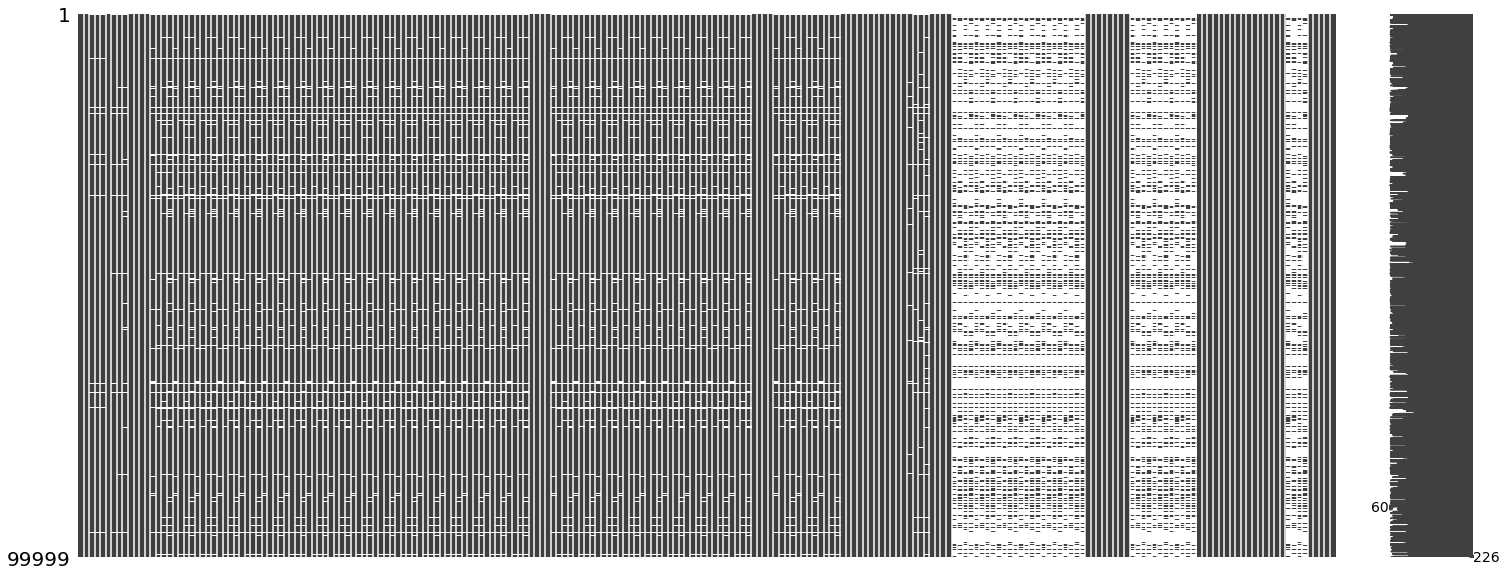

In [9]:
import missingno as msno

start_time=time.time()

msno.matrix(df_churn)

end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")

In [10]:
# Identifying missing values in recharge columns
recharge = ['total_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'max_rech_data_6', 'av_rech_amt_data_6', 
            'total_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'max_rech_data_7', 'av_rech_amt_data_7', 
            'total_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'max_rech_data_8', 'av_rech_amt_data_8', 
            'total_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'max_rech_data_9', 'av_rech_amt_data_9']
df_churn[recharge].describe(include='all')

,total_rech_data_6,count_rech_2g_6,count_rech_3g_6,max_rech_data_6,av_rech_amt_data_6,total_rech_data_7,count_rech_2g_7,count_rech_3g_7,max_rech_data_7,av_rech_amt_data_7,total_rech_data_8,count_rech_2g_8,count_rech_3g_8,max_rech_data_8,av_rech_amt_data_8,total_rech_data_9,count_rech_2g_9,count_rech_3g_9,max_rech_data_9,av_rech_amt_data_9
count,25153.000000,25153.000000,25153.000000,25153.000000,25153.000000,25571.000000,25571.000000,25571.000000,25571.000000,25571.000000,26339.000000,26339.000000,26339.000000,26339.000000,26339.000000,25922.000000,25922.000000,25922.000000,25922.00000,25922.000000
mean,2.463802,1.864668,0.599133,126.393392,192.600982,2.666419,2.044699,0.621720,126.729459,200.981292,2.651999,2.016288,0.635711,125.717301,197.526489,2.441170,1.781807,0.659363,124.94144,192.734315
std,2.789128,2.570254,1.274428,108.477235,192.646318,3.031593,2.768332,1.394524,109.765267,196.791224,3.074987,2.720132,1.422827,109.437851,191.301305,2.516339,2.214701,1.411513,111.36376,188.400286
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.00000,1.000000
25%,1.000000,1.000000,0.000000,25.000000,82.000000,1.000000,1.000000,0.000000,25.000000,92.000000,1.000000,1.000000,0.000000,25.000000,87.000000,1.000000,1.000000,0.000000,25.00000,69.000000
50%,1.000000,1.000000,0.000000,145.000000,154.000000,1.000000,1.000000,0.000000,145.000000,154.000000,1.000000,1.000000,0.000000,145.000000,154.000000,2.000000,1.000000,0.000000,145.00000,164.000000
75%,3.000000,2.000000,1.000000,177.000000,252.000000,3.000000,2.000000,1.000000,177.000000,252.000000,3.000000,2.000000,1.000000,179.000000,252.000000,3.000000,2.000000,1.000000,179.00000,252.000000
max,61.000000,42.000000,29.000000,1555.000000,7546.000000,54.000000,48.000000,35.000000,1555.000000,4365.000000,60.000000,44.000000,45.000000,1555.000000,4076.000000,84.000000,40.000000,49.000000,1555.00000,4061.000000


In [11]:
# Impute missing values in recharge columns with 0
df_churn[recharge] = df_churn[recharge].apply(lambda x: x.fillna(0))

In [12]:
#Check the null values in recharge columns after imputing with zero.
print(df_churn[recharge].isnull().sum()*100/len(df_churn))

total_rech_data_6     0.0
count_rech_2g_6       0.0
count_rech_3g_6       0.0
max_rech_data_6       0.0
av_rech_amt_data_6    0.0
total_rech_data_7     0.0
count_rech_2g_7       0.0
count_rech_3g_7       0.0
max_rech_data_7       0.0
av_rech_amt_data_7    0.0
total_rech_data_8     0.0
count_rech_2g_8       0.0
count_rech_3g_8       0.0
max_rech_data_8       0.0
av_rech_amt_data_8    0.0
total_rech_data_9     0.0
count_rech_2g_9       0.0
count_rech_3g_9       0.0
max_rech_data_9       0.0
av_rech_amt_data_9    0.0
dtype: float64


In [13]:
# Impute values in Categorical Features

In [14]:
# Drop mobile_number, circle_id and date related columns
col_date = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
        'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
        'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8','date_of_last_rech_data_9' ]

cols_drop = ['mobile_number', 'circle_id'] + col_date

print("Shape Before: ", df_churn.shape)
df_churn = df_churn.drop(cols_drop, axis=1)
print("Shape After: ", df_churn.shape)

Shape Before:  (99999, 226)
Shape After:  (99999, 212)


In [15]:
# Drop features with more than 60% NaN / Null values
df_churn = df_churn.loc[:, df_churn.isnull().mean() < .70]

In [16]:
print("Shape After: ", df_churn.shape)

Shape After:  (99999, 196)


#### Observation
    We can see that after dropping columns having NaN values greater than equal to 70%. New shape of dataset is (99999,196) i.e. 16 columns dropped

## High Valued Customers
approximately 80% of revenue comes from the top 20% customers (called high-value customers)

### Calculating total data recharge amount
    total data recharge amount for June and July = number of recharges * average recharge amount

In [17]:
df_churn['total_data_rech_6'] = df_churn.total_rech_data_6 * df_churn.av_rech_amt_data_6
df_churn['total_data_rech_7'] = df_churn.total_rech_data_7 * df_churn.av_rech_amt_data_7

In [18]:
print("Shape After: ", df_churn.shape)

Shape After:  (99999, 198)


In [19]:
df_churn['total_data_rech_6'].describe()

count     99999.000000
mean        148.883796
std         804.258761
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max      105644.000000
Name: total_data_rech_6, dtype: float64

In [20]:
df_churn['total_data_rech_7'].describe()

count    99999.000000
mean       171.294755
std        843.284525
min          0.000000
25%          0.000000
50%          0.000000
75%         17.000000
max      55080.000000
Name: total_data_rech_7, dtype: float64

### Calculating total combined recharge amount 
toatal amount = total data recharge + total recharge amount , for months June and July

In [21]:
df_churn['amt_data_6'] = df_churn.total_rech_amt_6 + df_churn.total_data_rech_6
df_churn['amt_data_7'] = df_churn.total_rech_amt_7 + df_churn.total_data_rech_7

In [22]:
print("Shape After: ", df_churn.shape)

Shape After:  (99999, 200)


In [23]:
df_churn['amt_data_6'].describe()

count     99999.000000
mean        476.398411
std         965.021989
min           0.000000
25%         110.000000
50%         266.000000
75%         549.000000
max      113458.000000
Name: amt_data_6, dtype: float64

In [24]:
df_churn['amt_data_7'].describe()

count    99999.000000
mean       494.257724
std       1012.754850
min          0.000000
25%        110.000000
50%        258.000000
75%        550.000000
max      56075.000000
Name: amt_data_7, dtype: float64

### Calculating average recharge done by customer in June and July


In [25]:
df_churn['av_amt_data_6_and_7'] = (df_churn.amt_data_6 + df_churn.amt_data_7)/2

In [26]:
print("Shape After: ", df_churn.shape)

Shape After:  (99999, 201)


In [27]:
df_churn['av_amt_data_6_and_7'].describe()

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: av_amt_data_6_and_7, dtype: float64

### Filter High-Value Customers (HVC)
    According to problem statement:  
    We need to predict churn only for the high-value customers.
    Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [28]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df_churn.av_amt_data_6_and_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [29]:
# keeping only those customers who recharged their mobiles with more than or equal to 70th percentile amount
df_churn_hvc = df_churn.loc[df_churn.av_amt_data_6_and_7 >= df_churn.av_amt_data_6_and_7.quantile(0.7), :]
df_churn_hvc = df_churn_hvc.reset_index(drop=True)
df_churn_hvc.shape

(30001, 201)

#### Observations:
    1. Average of total data recharge in June = 148
    2. Average of total data recharge in July = 171
    3. Average of combined data and call recharge in June = 476
    4. Average of combined data and call recharge in July = 494
    5. Average of combined data and call recharge in June and July = 485
    6. Recharge amount at 70th percentile: 478.0, which is the cut off criteria for HVC.
    7. Shape of dataset after filtering out less than 70 percentile = (30001, 201)

## Tagging churners

In [30]:
# calculating total incoming and outgoing minutes of usage
df_churn_hvc['total_calls_mou_9'] = df_churn_hvc.total_ic_mou_9 + df_churn_hvc.total_og_mou_9
df_churn_hvc.shape

(30001, 202)

In [31]:
df_churn_hvc['total_calls_mou_9'].describe()

count    30001.000000
mean       765.770716
std        830.209140
min          0.000000
25%        150.500000
50%        551.590000
75%       1100.380000
max      12852.510000
Name: total_calls_mou_9, dtype: float64

In [32]:
# calculating total 2g and 3g data consumption
df_churn_hvc['total_internet_mb_9'] =  df_churn_hvc.vol_2g_mb_9 + df_churn_hvc.vol_3g_mb_9
df_churn_hvc.shape

(30001, 203)

In [33]:
df_churn_hvc['total_internet_mb_9'].describe()

count    30001.000000
mean       440.949758
std        987.935450
min          0.000000
25%          0.000000
50%          0.000000
75%        563.490000
max      39221.270000
Name: total_internet_mb_9, dtype: float64

In [34]:
# Before tagging Churn, check these  columns have null values or not 
100*df_churn_hvc.loc[:,['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isnull().sum()/len(df_churn_hvc)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

### Creating churn column:
According to the problem statement those who have not used either calls or internet in the month of September are customers who have churned


In [35]:
# 0 - not churn, 1 - churn
df_churn_hvc['churn'] = df_churn_hvc.apply(
    lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)


In [36]:
# all columns related to last month will be "*_9"
total_cols = df_churn_hvc.columns.values
total_cols

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9

In [37]:
col_with_9 = []
for i in total_cols:
    if '_9' in i:
        col_with_9.append(i)
col_with_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'total_calls_mou_9',
 'total_internet_mb_9']

In [38]:
# deleting all columns related to last month , accordig to problem statement
df_churn_hvc = df_churn_hvc.drop(col_with_9, axis=1)


In [39]:
df_churn_hvc.shape

(30001, 155)

In [40]:
df_churn_hvc['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [41]:
# churn ratio in percentage
df_churn_hvc['churn'].value_counts()*100/df_churn_hvc.shape[0]

0    91.863605
1     8.136395
Name: churn, dtype: float64

---
## 3. EDA and Data Visulazation
    - Create Pie chart for Churn vs Non-Churn
    - Bar plot for 'maximum recharge for data' month wise (6,7 & 8 months) for Churn vs Non-Churn
    - Bar plot for 'total voice recharge amount' month wise for  Churn vs Non-Churn
    - Bar plot for 'total data recharge amount' month wise for  Churn vs Non-Churn
    - Bar plot for 'total recharge count for data (2G+3G)' month wise for  Churn vs Non-Churn
    - Bar plot for 'volume of data (2G+3G) usage' month wise for  Churn vs Non-Churn
    - Bar plot for 'total std calls (ic+og)' month wise for  Churn vs Non-Churn
    - Bar plot for 'total local calls (ic+og)' month wise for  Churn vs Non-Churn
    - Pairplot for important columns like recharge, voice usage and data usage related columns
    - Dist plot and bar plot for tenure feature
    - Box plot for tenure for  Churn vs Non-Churn
    - Merge column related to 6 & 7 and make average columns. 
    
 ---

In [42]:
! pip install plotly 

In [43]:
import plotly.express as px

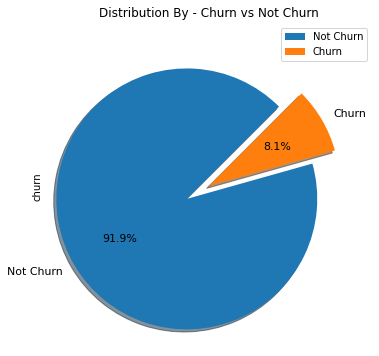

In [44]:
# Pie chart for Churn vs Non-Churn

myexplode = [0.2, 0]
labels = 'Not Churn', 'Churn'
plot = df_churn_hvc.churn.value_counts().plot.pie(figsize=(6, 6),fontsize=11,legend=True,
                                                  title='Distribution By - Churn vs Not Churn',autopct='%1.1f%%',
                                                  explode = myexplode, shadow=True, startangle=45, labels= labels)

#### Observations:
`91.9%` are non- churn customers and `8.1%` are churn customers in data set. Which shows that data set is bit inbalance.

In [45]:
# Helper function to plot graph for bivariate analyis
def bar_plot(feature_6, feature_7, feature_8):
    plt.figure(figsize=(21,17))
    df_chart = df_churn_hvc # Pass dataframe name as per the usage
    plt.subplot(2,3,1)
    sns.barplot(data=df_chart, y=feature_6, x="churn",hue="churn")
    plt.subplot(2,3,2)
    sns.barplot(data=df_chart, y=feature_7, x="churn",hue="churn")
    plt.subplot(2,3,3)
    sns.barplot(data=df_chart, y=feature_8, x="churn",hue="churn")
    plt.show()

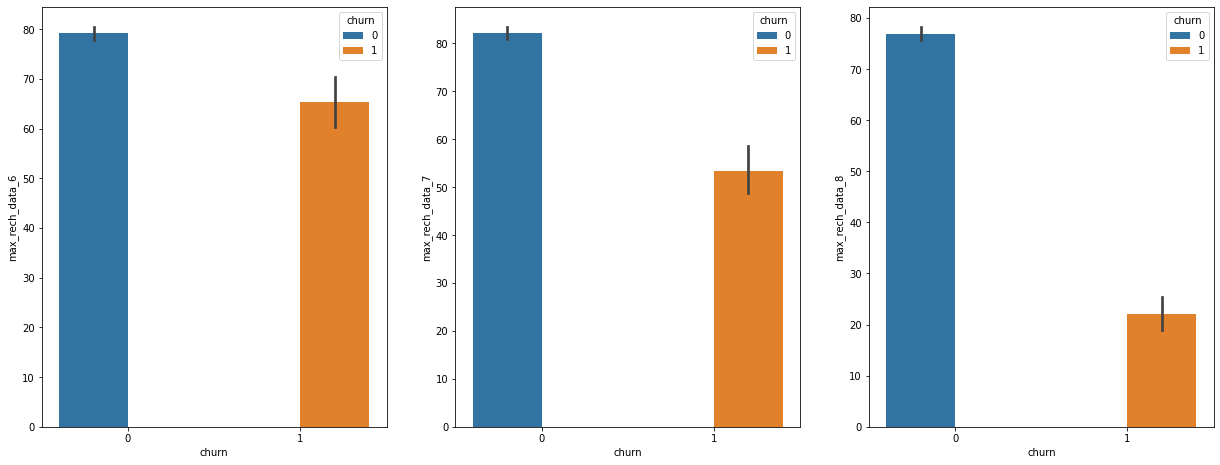

In [46]:
# Ploting analysis for maximum recharge for data 
bar_plot('max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8')

#### Observation:
It is observed that there is a huge `drop` in `maximum recharge for data` in the `action` phase i.e. 8th Month (August) for churned customers.

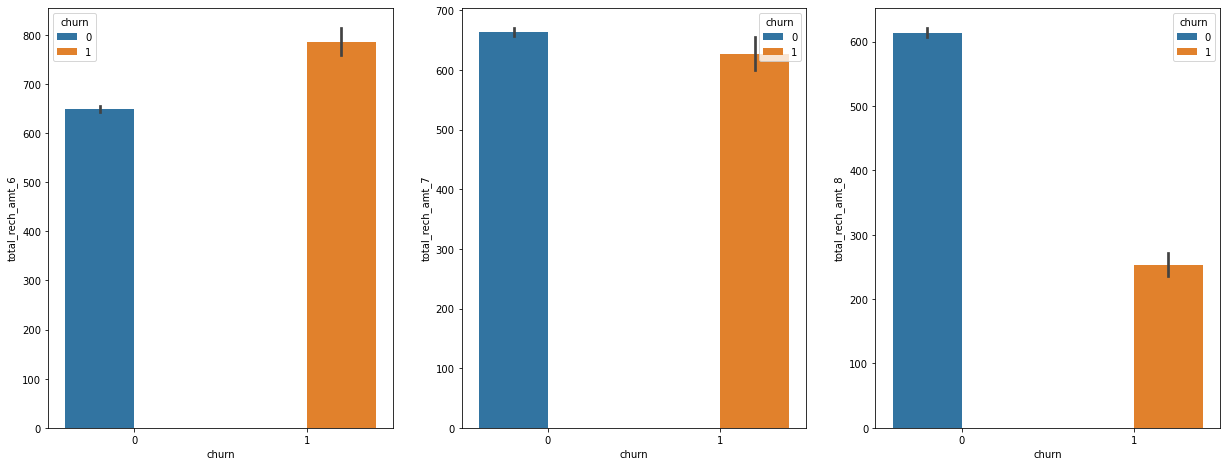

In [47]:
# Ploting analysis for total voice recharge amount 
bar_plot('total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8')

#### Observation:
It is observed that there is a huge `drop` in `total voice recharge amount` in the `action` phase i.e. 8th Month (August) for churned customers. 

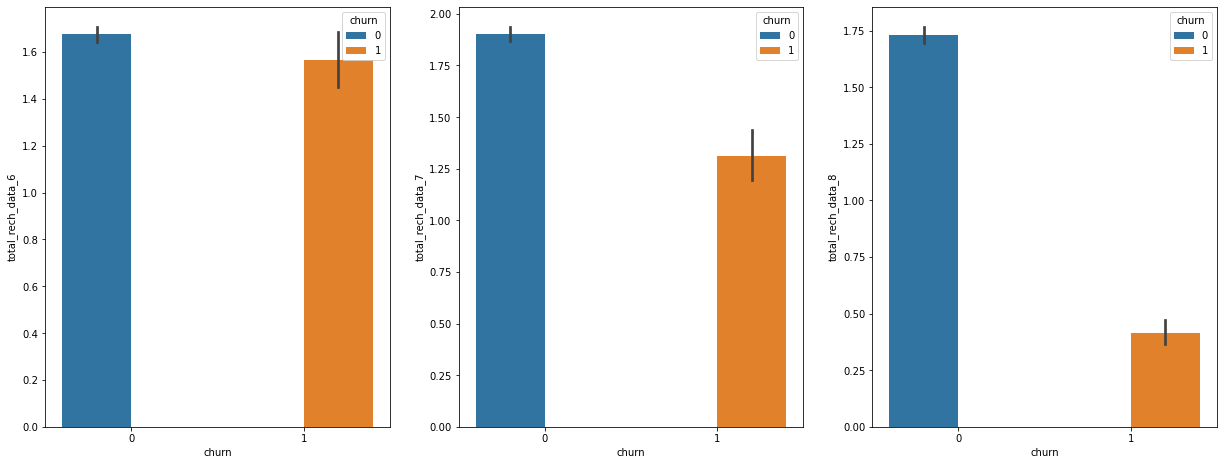

In [48]:
# Ploting analysis for total data recharge amount 
bar_plot('total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8')

#### Observation:
- It is observed that here is a huge `drop` in `total data recharge amount` in the `action` phase i.e. 8th Month (August) for churned customers. 
- Recharge related columns shows huge `drop` in amount in the `8th month` (action phase) for churned customers.

### Creating derived columns for Data Visualization

In [49]:
# 1. recharge count data  = count recharge 2G + count recharge 3G 
df_churn_hvc['total_rech_count_data_6'] = df_churn_hvc.count_rech_2g_6 + df_churn_hvc.count_rech_3g_6
df_churn_hvc['total_rech_count_data_7'] = df_churn_hvc.count_rech_2g_7 + df_churn_hvc.count_rech_3g_7
df_churn_hvc['total_rech_count_data_8'] = df_churn_hvc.count_rech_2g_8 + df_churn_hvc.count_rech_3g_8


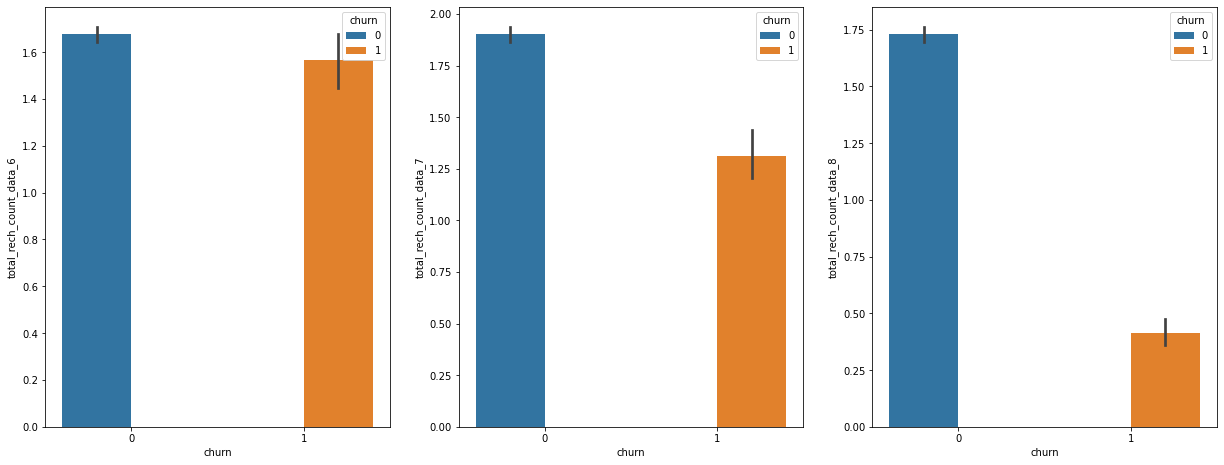

In [50]:
# Ploting analysis for total recharge count for data (2G+3G) 
bar_plot('total_rech_count_data_6', 'total_rech_count_data_7', 'total_rech_count_data_8')

#### Observation:
It is observed that there is a huge `drop` in `total data recharge count for 2G and 3G` in the `action` phase i.e. 8th Month (August) for churned customers. 

In [51]:
# 2. volume data used = 2g volume use + 3g volume used
df_churn_hvc['total_rech_vol_data_6'] = df_churn_hvc.vol_2g_mb_6 + df_churn_hvc.vol_3g_mb_6
df_churn_hvc['total_rech_vol_data_7'] = df_churn_hvc.vol_2g_mb_7 + df_churn_hvc.vol_3g_mb_7
df_churn_hvc['total_rech_vol_data_8'] = df_churn_hvc.vol_2g_mb_8 + df_churn_hvc.vol_3g_mb_8


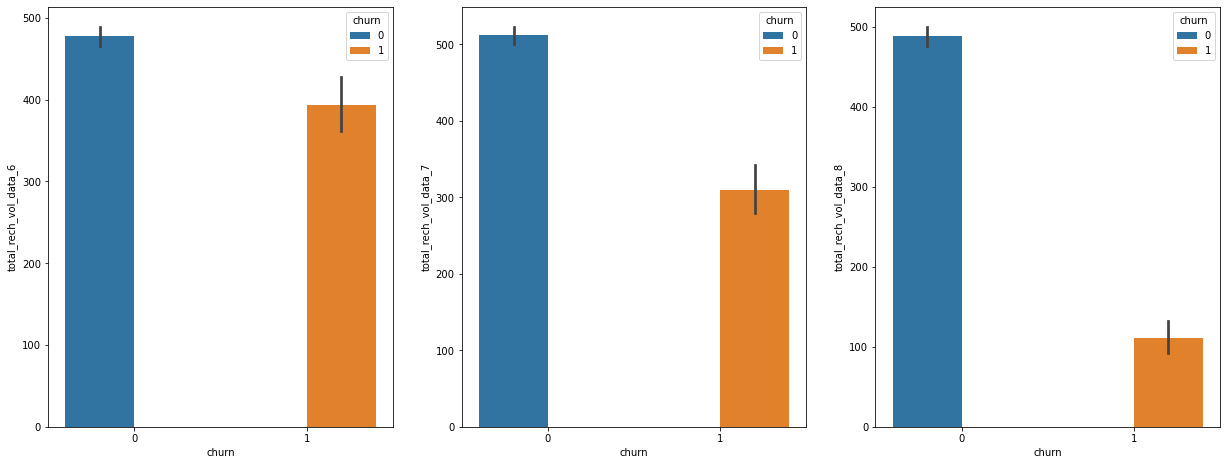

In [52]:
# Ploting analysis for volume of data (2G+3G) usage
bar_plot('total_rech_vol_data_6', 'total_rech_vol_data_7', 'total_rech_vol_data_8')

#### Observations:
- It is observed that there is a huge `drop` in `total data usage for 2G and 3G` in the `action` phase i.e. 8th Month (August) for churned customers.
- Also 2G and 3G usage are `higher` for `non churned` customers, which means that `churned` customers might be facing `issue with 2G and 3G services`. This can be checked with business to understand that whether Churned customer are from specific areas and also need to check are these areas having any data connectivity issues, reported earlier. 

In [53]:
# 3. total std calls  = std_og_mou_6 + std_og_t2c_mou_6 + std_og_t2f_mou_6 + std_og_t2m_mou_6
df_churn_hvc['total_std_calls_6'] = df_churn_hvc.std_og_mou_6 + df_churn_hvc.std_og_t2c_mou_6 + df_churn_hvc.std_og_t2f_mou_6 + df_churn_hvc.std_og_t2m_mou_6
df_churn_hvc['total_std_calls_7'] = df_churn_hvc.std_og_mou_7 + df_churn_hvc.std_og_t2c_mou_7 + df_churn_hvc.std_og_t2f_mou_7 + df_churn_hvc.std_og_t2m_mou_7
df_churn_hvc['total_std_calls_8'] =  df_churn_hvc.std_og_mou_8 + df_churn_hvc.std_og_t2c_mou_8 + df_churn_hvc.std_og_t2f_mou_8 + df_churn_hvc.std_og_t2m_mou_8


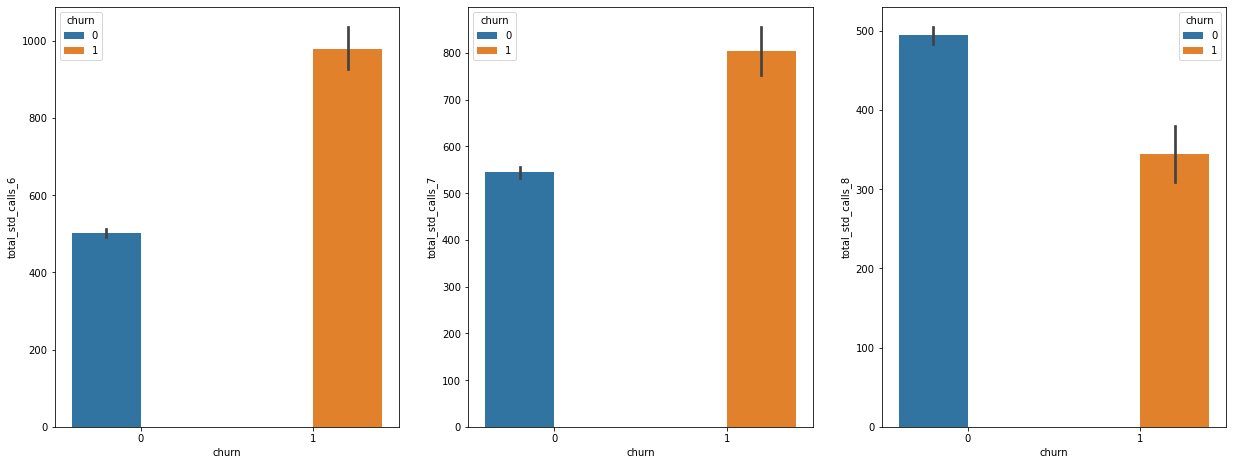

In [54]:
# Ploting analysis for STD (voice call) usage
bar_plot('total_std_calls_6', 'total_std_calls_7', 'total_std_calls_8')

#### Observation:
- It is observed that there is `drop` in `STD voice call usage` for churned customer in the `action` phase i.e. 8th Month (August).
- Even there is drop in STD voice call usage for Churned customers, howvever it is showing decent usage. Most of the `churn users` are `STD caller`. 
- We are seeing `Constant trend` in `STD voice call usage` for `non-churned` customer in 6, 7 & 8 months.
- Need to invistigate with business why churned customer reduces the STD calls, is it due to some network issues (like connectivity, call drop, etc) or increase in STD rate.

In [55]:
# 4. total local calls = loc_og_mou_6 + loc_og_t2c_mou_6 +loc_og_t2f_mou_6 +loc_og_t2t_mou_6 + loc_og_t2m_mou_6
df_churn_hvc['total_loc_calls_6'] = df_churn_hvc.loc_og_mou_6 + df_churn_hvc.loc_og_t2c_mou_6 + df_churn_hvc.loc_og_t2f_mou_6 + df_churn_hvc.loc_og_t2m_mou_6
df_churn_hvc['total_loc_calls_7'] = df_churn_hvc.loc_og_mou_7 + df_churn_hvc.loc_og_t2c_mou_7 + df_churn_hvc.loc_og_t2f_mou_7 + df_churn_hvc.loc_og_t2m_mou_7
df_churn_hvc['total_loc_calls_8'] =  df_churn_hvc.loc_og_mou_8 + df_churn_hvc.loc_og_t2c_mou_8 + df_churn_hvc.loc_og_t2f_mou_8 + df_churn_hvc.loc_og_t2m_mou_8


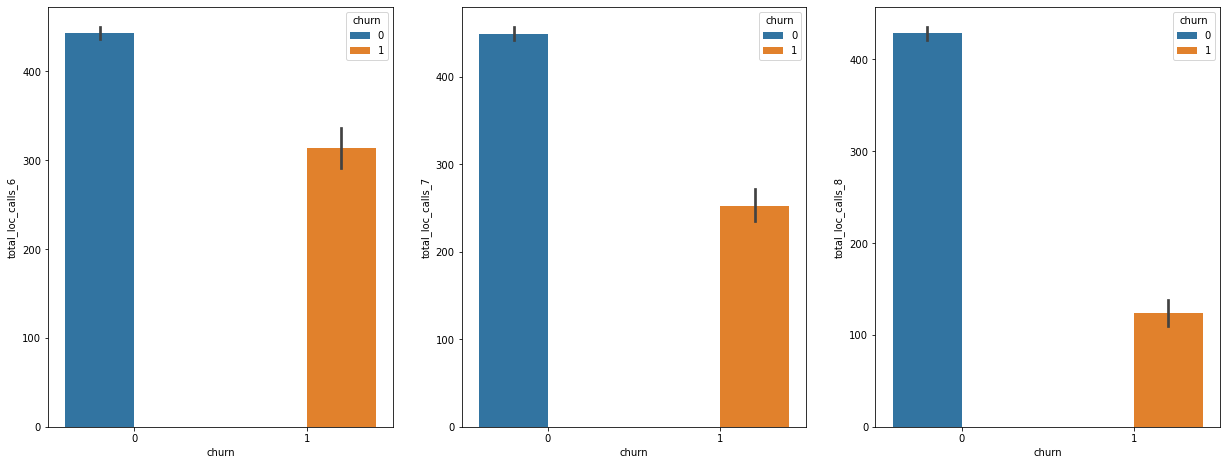

In [56]:
# Ploting analysis for Local call usage
bar_plot('total_loc_calls_6', 'total_loc_calls_7', 'total_loc_calls_8')

#### Observation:
- It is observed that there is a `huge drop` in `Local voice call usage` in the `action` phase i.e. 8th Month (August) for churned customers.
- Need to invistigate with business why churned customer reduces the Local calls, is it due to some network issues (like connectivity, call drop, etc) or increase in Local call rate.

<Figure size 1440x1296 with 0 Axes>

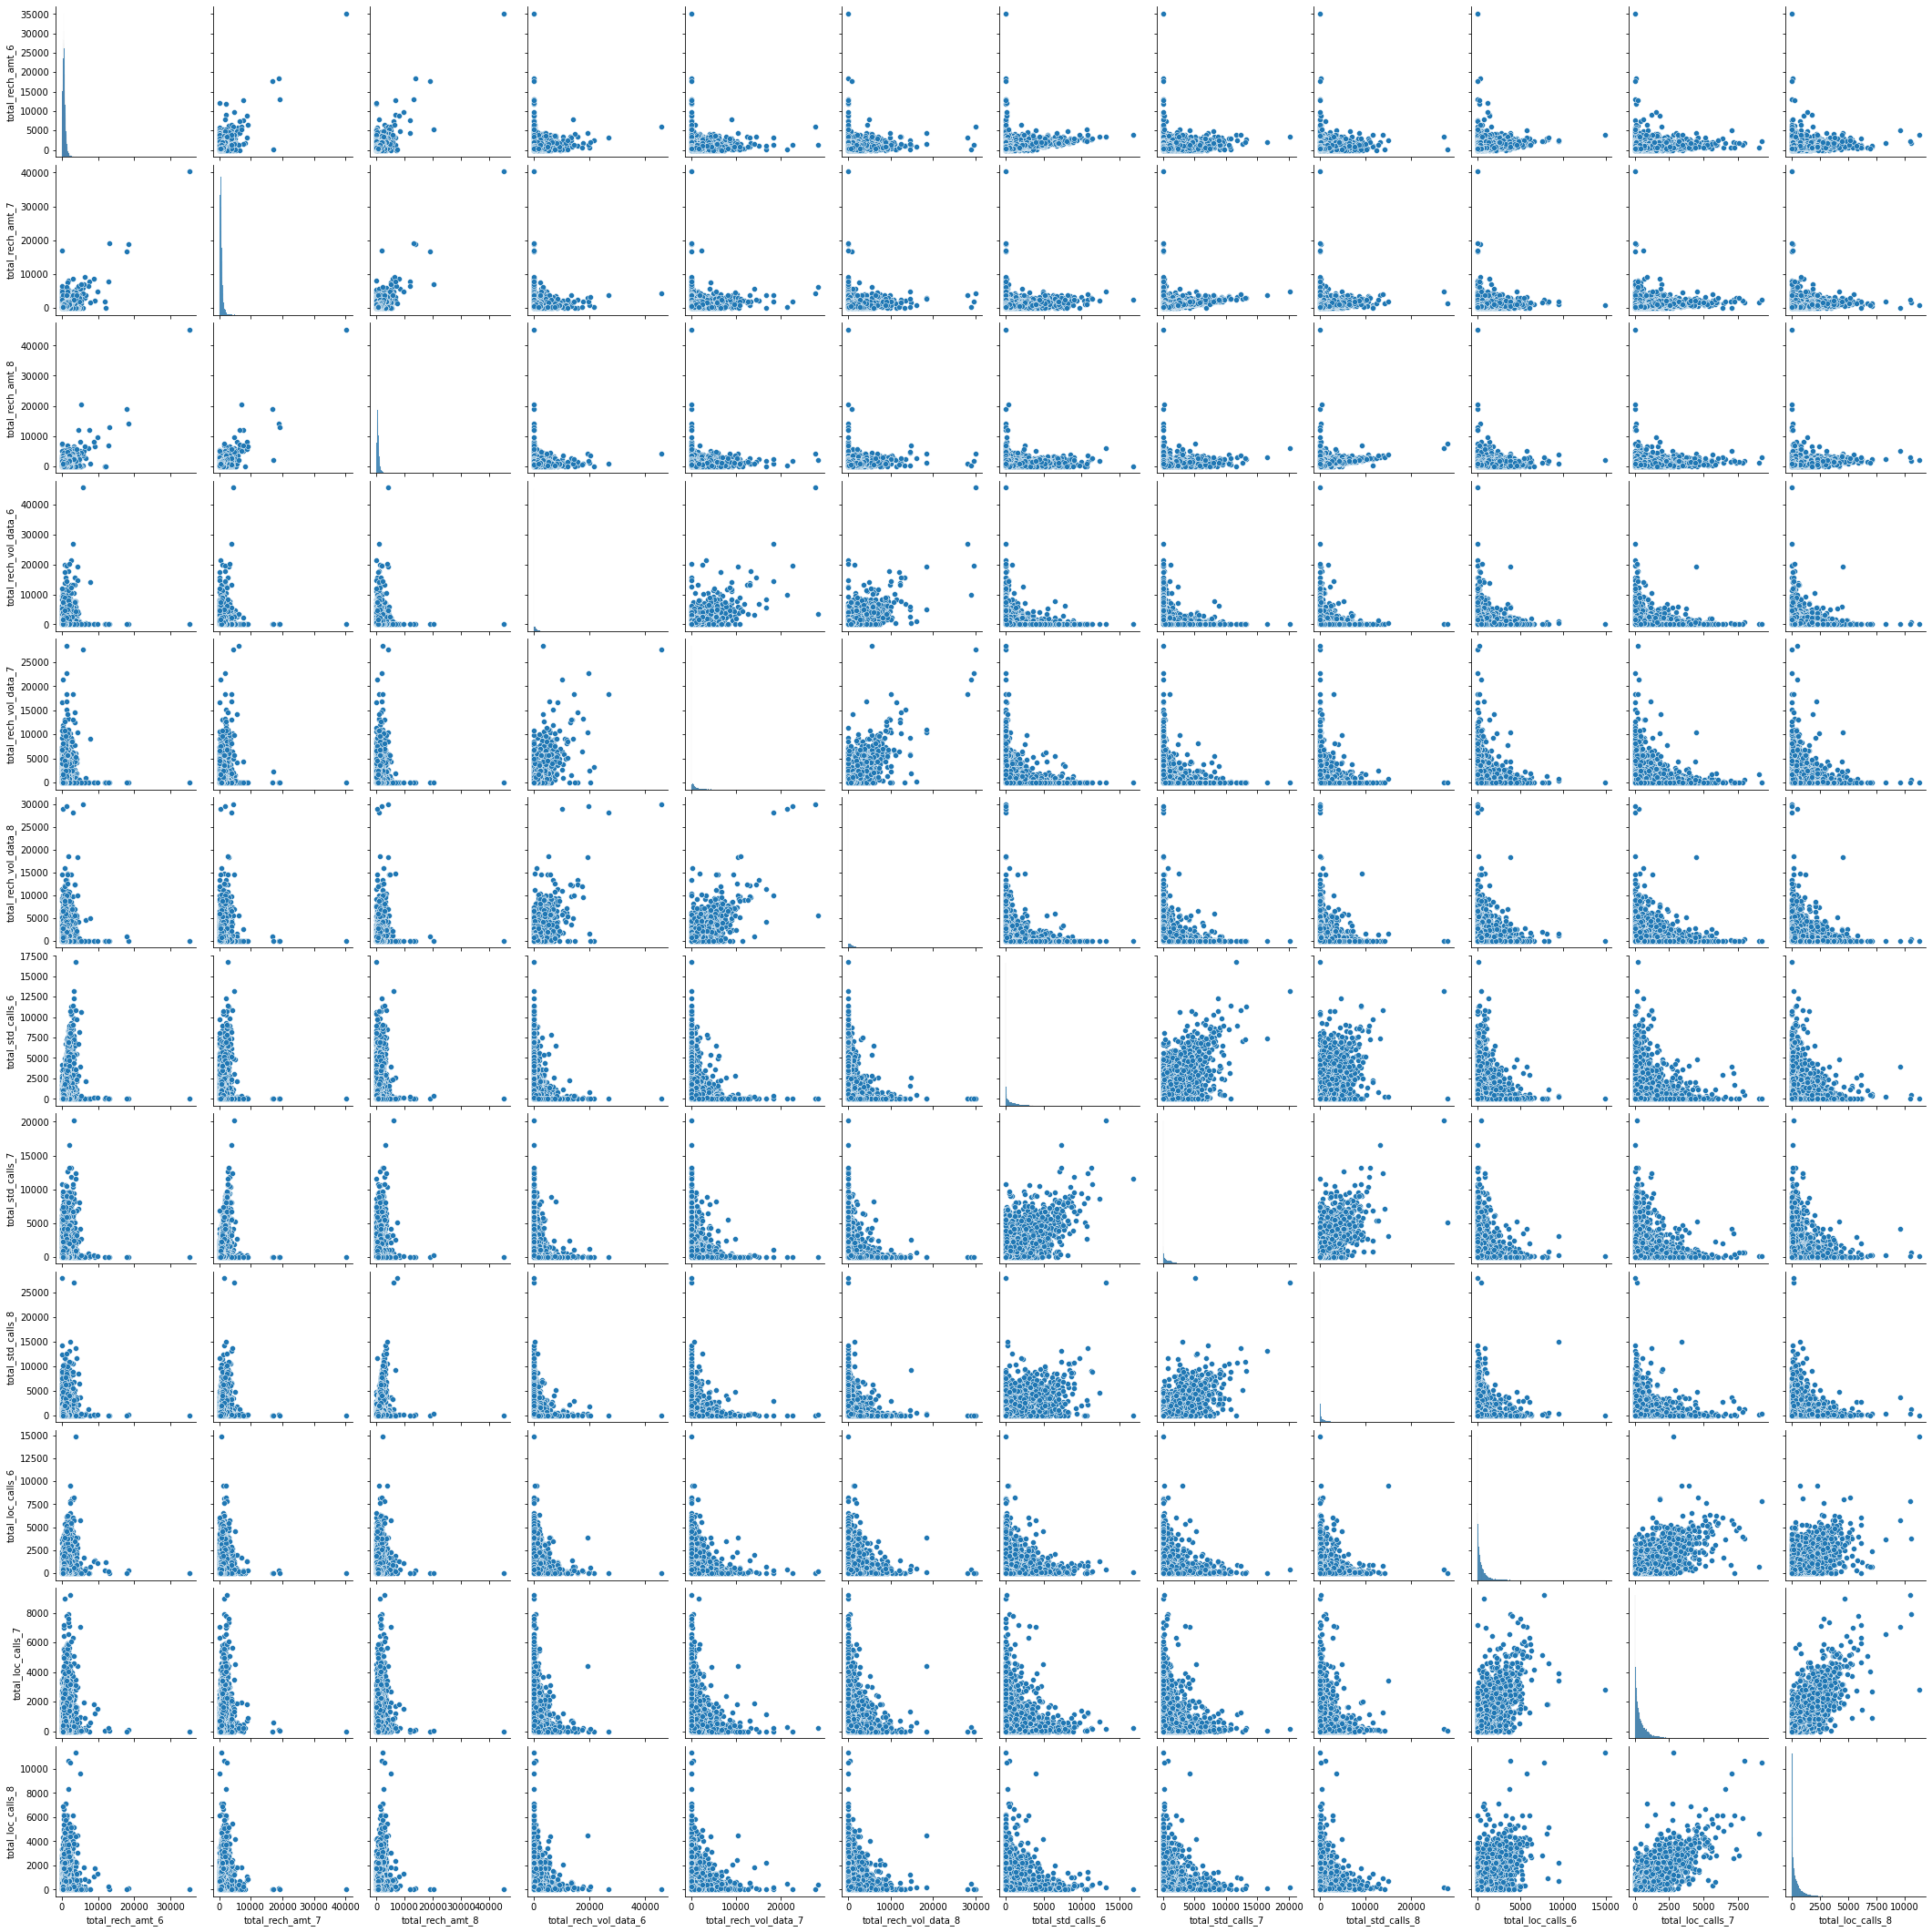

In [57]:
# pair plot important columns
pair_plt_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                 'total_rech_vol_data_6', 'total_rech_vol_data_7', 'total_rech_vol_data_8',
                 'total_std_calls_6', 'total_std_calls_7', 'total_std_calls_8',
                 'total_loc_calls_6', 'total_loc_calls_7', 'total_loc_calls_8']

pair_plt = df_churn_hvc[pair_plt_cols]
plt.figure(figsize=(20,18))
sns.pairplot(pair_plt)
plt.show()


### EDA on aon i.e. no of days a customer using the network

In [58]:
# creating a new variable 'tenure'
df_churn_hvc['tenure'] = (df_churn_hvc['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
# df_churn_hvc.drop('aon',axis=1, inplace=True)

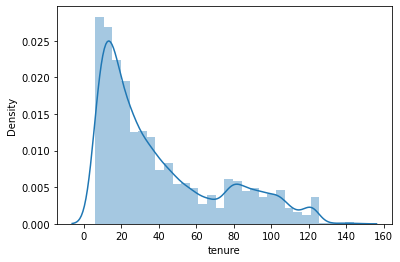

In [59]:
# Checking the distribution of he tenure variable

sns.distplot(df_churn_hvc['tenure'],bins=30)
plt.show()


In [60]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_churn_hvc['tenure_range'] = pd.cut(df_churn_hvc['tenure'], tn_range, labels=tn_label)
df_churn_hvc['tenure_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

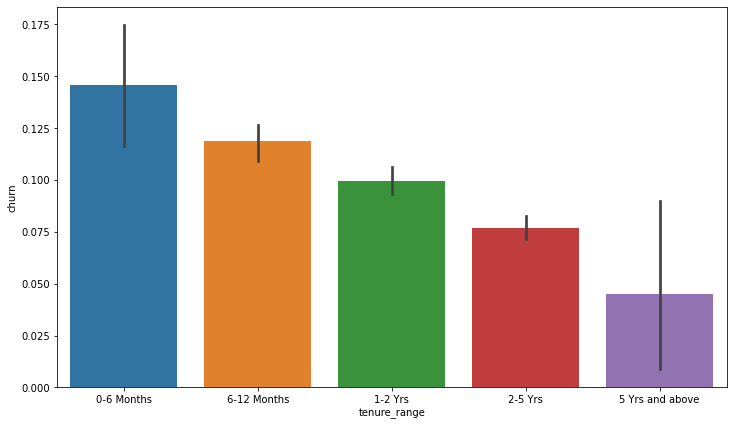

In [61]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=df_churn_hvc)
plt.show()

#### Observation:
Customers with less than 2 years of tenure are more likely to churn and Business should concentrate more on that segment by rolling out new schemes to that group of customers.

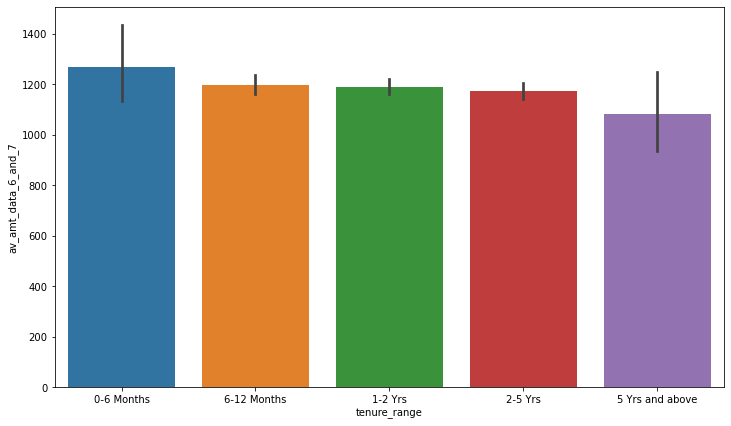

In [62]:
# Plotting a bar plot for tenure range vs av_amt_data_6_and_7
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='av_amt_data_6_and_7', data=df_churn_hvc)
plt.show()

In [63]:
df_churn_hvc["avg_arpu_6_7"]= (df_churn_hvc['arpu_6']+df_churn_hvc['arpu_7'])/2
df_churn_hvc['avg_arpu_6_7'].head()

0     206.1005
1    1209.5150
2     435.4720
3     556.1030
4     134.1235
Name: avg_arpu_6_7, dtype: float64

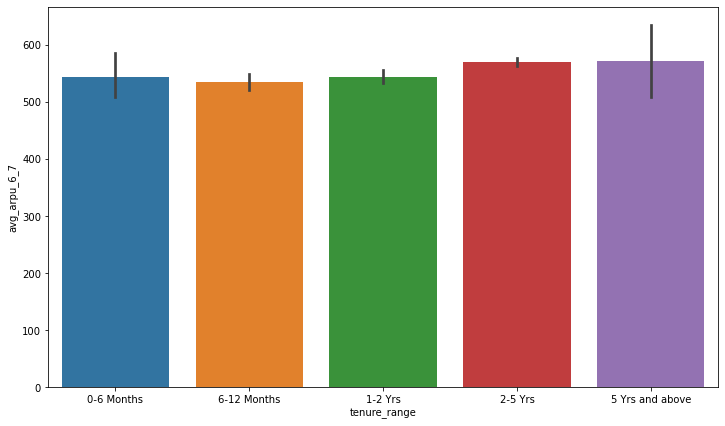

In [64]:
# Plotting a bar plot for tenure range vs average revenue per user (arpu)
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='avg_arpu_6_7', data=df_churn_hvc)
plt.show()

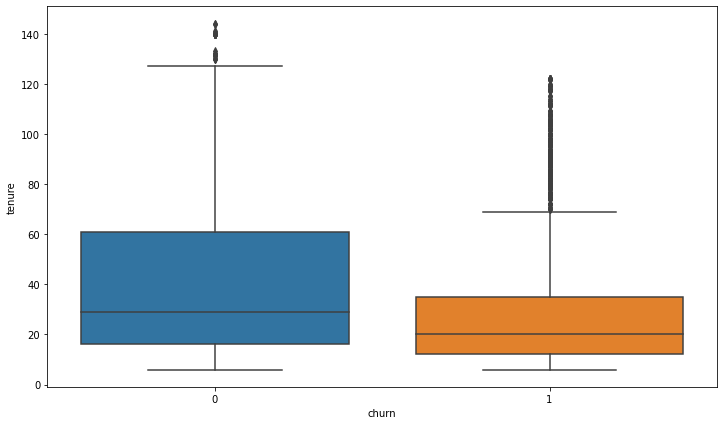

In [65]:
# tenure vs churn
plt.figure(figsize=[12,7])
sns.boxplot(x = df_churn_hvc.churn, y = df_churn_hvc.tenure)
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

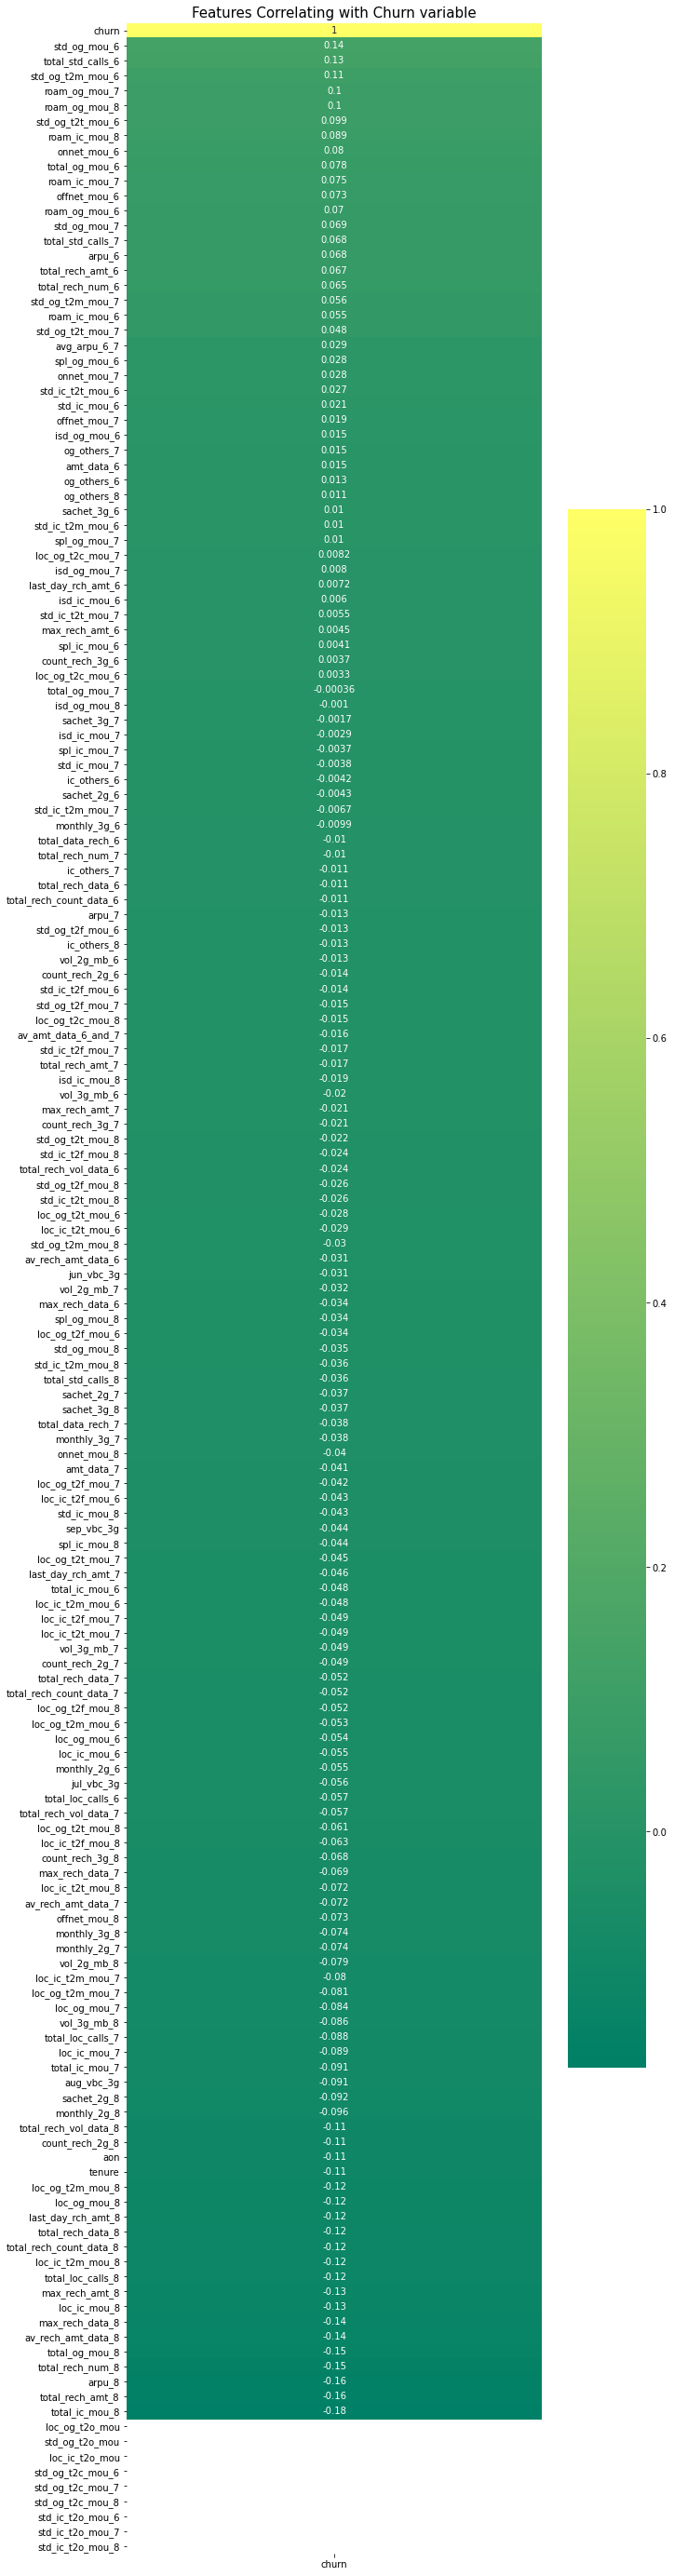

In [66]:
# Checking Correlation between target variable with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(df_churn_hvc.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)


# Feature selection 

In [67]:
df_churn_hvc_M1 = df_churn_hvc.copy()

In [68]:
df_churn_hvc_M1.shape

(30001, 170)

In [69]:
# Let us check the missing values percentages again for the HVC group
    # Checkng the overall missing values in the dataset
((df_churn_hvc_M1.isnull().sum()/df_churn_hvc_M1.shape[0])*100).round(2).sort_values(ascending=False)

tenure_range        23.76
std_og_t2c_mou_8     3.91
loc_ic_t2t_mou_8     3.91
loc_og_t2c_mou_8     3.91
loc_og_mou_8         3.91
                    ...  
count_rech_2g_6      0.00
max_rech_data_8      0.00
max_rech_data_7      0.00
max_rech_data_6      0.00
avg_arpu_6_7         0.00
Length: 170, dtype: float64

In [70]:
# droppig tenure 
df_churn_hvc_M1.drop(['tenure_range'], axis=1, inplace=True)

The remaining attributes with missing value can be imputed using the advanced imputation technique like KNNImputer

In [71]:
df_churn_hvc_M1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 169 entries, loc_og_t2o_mou to avg_arpu_6_7
dtypes: float64(143), int64(26)
memory usage: 38.7 MB


### Deriving new columns from month 6 and 7, because all columns related to June and July are showing same pattern in the EDA . So we can take average of both and drop the individual columns

In [72]:
# creating a list of column names for each month
mon_6_cols = [col for col in df_churn_hvc.columns if '_6' in col]
mon_7_cols = [col for col in df_churn_hvc.columns if '_7' in col]

In [73]:
mon_6_cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'total_data_rech_6',
 'amt_data_6',
 'av_amt_data_6_and_7',
 'total_rech_count_data_6',
 'total_rech_vol_data_6

In [74]:
mon_7_cols

['arpu_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'total_rech_num_7',
 'total_rech_amt_7',
 'max_rech_amt_7',
 'last_day_rch_amt_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'vol_2g_mb_7',
 'vol_3g_mb_7',
 'monthly_2g_7',
 'sachet_2g_7',
 'monthly_3g_7',
 'sachet_3g_7',
 'total_data_rech_7',
 'amt_data_7',
 'av_amt_data_6_and_7',
 'total_rech_count_data_7',
 'total_rech_vol_data_7

In [75]:
avg_mon_6_7_col = []
for i in mon_6_cols:
    avg_mon_6_7_col.append('avg_6_7_'+i[:-2])
avg_mon_6_7_col

['avg_6_7_arpu',
 'avg_6_7_onnet_mou',
 'avg_6_7_offnet_mou',
 'avg_6_7_roam_ic_mou',
 'avg_6_7_roam_og_mou',
 'avg_6_7_loc_og_t2t_mou',
 'avg_6_7_loc_og_t2m_mou',
 'avg_6_7_loc_og_t2f_mou',
 'avg_6_7_loc_og_t2c_mou',
 'avg_6_7_loc_og_mou',
 'avg_6_7_std_og_t2t_mou',
 'avg_6_7_std_og_t2m_mou',
 'avg_6_7_std_og_t2f_mou',
 'avg_6_7_std_og_t2c_mou',
 'avg_6_7_std_og_mou',
 'avg_6_7_isd_og_mou',
 'avg_6_7_spl_og_mou',
 'avg_6_7_og_others',
 'avg_6_7_total_og_mou',
 'avg_6_7_loc_ic_t2t_mou',
 'avg_6_7_loc_ic_t2m_mou',
 'avg_6_7_loc_ic_t2f_mou',
 'avg_6_7_loc_ic_mou',
 'avg_6_7_std_ic_t2t_mou',
 'avg_6_7_std_ic_t2m_mou',
 'avg_6_7_std_ic_t2f_mou',
 'avg_6_7_std_ic_t2o_mou',
 'avg_6_7_std_ic_mou',
 'avg_6_7_total_ic_mou',
 'avg_6_7_spl_ic_mou',
 'avg_6_7_isd_ic_mou',
 'avg_6_7_ic_others',
 'avg_6_7_total_rech_num',
 'avg_6_7_total_rech_amt',
 'avg_6_7_max_rech_amt',
 'avg_6_7_last_day_rch_amt',
 'avg_6_7_total_rech_data',
 'avg_6_7_max_rech_data',
 'avg_6_7_count_rech_2g',
 'avg_6_7_count_rec

In [76]:
print(len(mon_6_cols),len(mon_7_cols),len(avg_mon_6_7_col))

55 55 55


In [77]:
# function for creating new feature from months June and July
def newcols(june_cols,july_cols,june_july_cols):
    df = df_churn_hvc_M1
    for i in range(len(june_cols)):
        df[june_july_cols[i]] = (df[june_cols[i]] + df[july_cols[i]])/2
    return df

In [78]:
df_churn_hvc_M1 = newcols(mon_6_cols,mon_7_cols,avg_mon_6_7_col)

In [79]:
df_churn_hvc_M1.shape

(30001, 224)

In [80]:
df_churn_hvc_M1[avg_mon_6_7_col].head()

,avg_6_7_arpu,avg_6_7_onnet_mou,avg_6_7_offnet_mou,avg_6_7_roam_ic_mou,avg_6_7_roam_og_mou,avg_6_7_loc_og_t2t_mou,avg_6_7_loc_og_t2m_mou,avg_6_7_loc_og_t2f_mou,avg_6_7_loc_og_t2c_mou,avg_6_7_loc_og_mou,...,avg_6_7_monthly_3g,avg_6_7_sachet_3g,avg_6_7_total_data_rech,avg_6_7_amt_data,avg_6_7_av_amt_data_6_and,avg_6_7_total_rech_count_data,avg_6_7_total_rech_vol_data,avg_6_7_total_std_calls,avg_6_7_total_loc_calls,avg_6_7_avg_arpu_6
0,206.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,252.0,559.0,559.0,1.0,132.890,NaN,NaN,206.1005
1,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,...,0.0,0.0,0.0,1185.0,1185.0,0.0,0.000,122.195,914.675,1209.5150
2,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,...,0.0,0.0,177.0,696.0,696.0,1.0,553.475,148.735,408.905,435.4720
3,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,...,0.0,0.0,0.0,640.0,640.0,0.0,0.000,1586.040,185.810,556.1030
4,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,...,1.0,0.0,356.0,583.0,583.0,1.0,299.785,8.710,215.770,134.1235


In [81]:
# Now droping the redundand columns , i.e individual june and july columns
df_churn_hvc_M1.drop(mon_7_cols, axis=1, inplace=True)


In [82]:
mon_6_cols.remove('av_amt_data_6_and_7')
mon_6_cols.remove('avg_arpu_6_7')
df_churn_hvc_M1.drop(mon_6_cols, axis=1, inplace=True)

In [83]:
df_churn_hvc_M1.shape

(30001, 116)

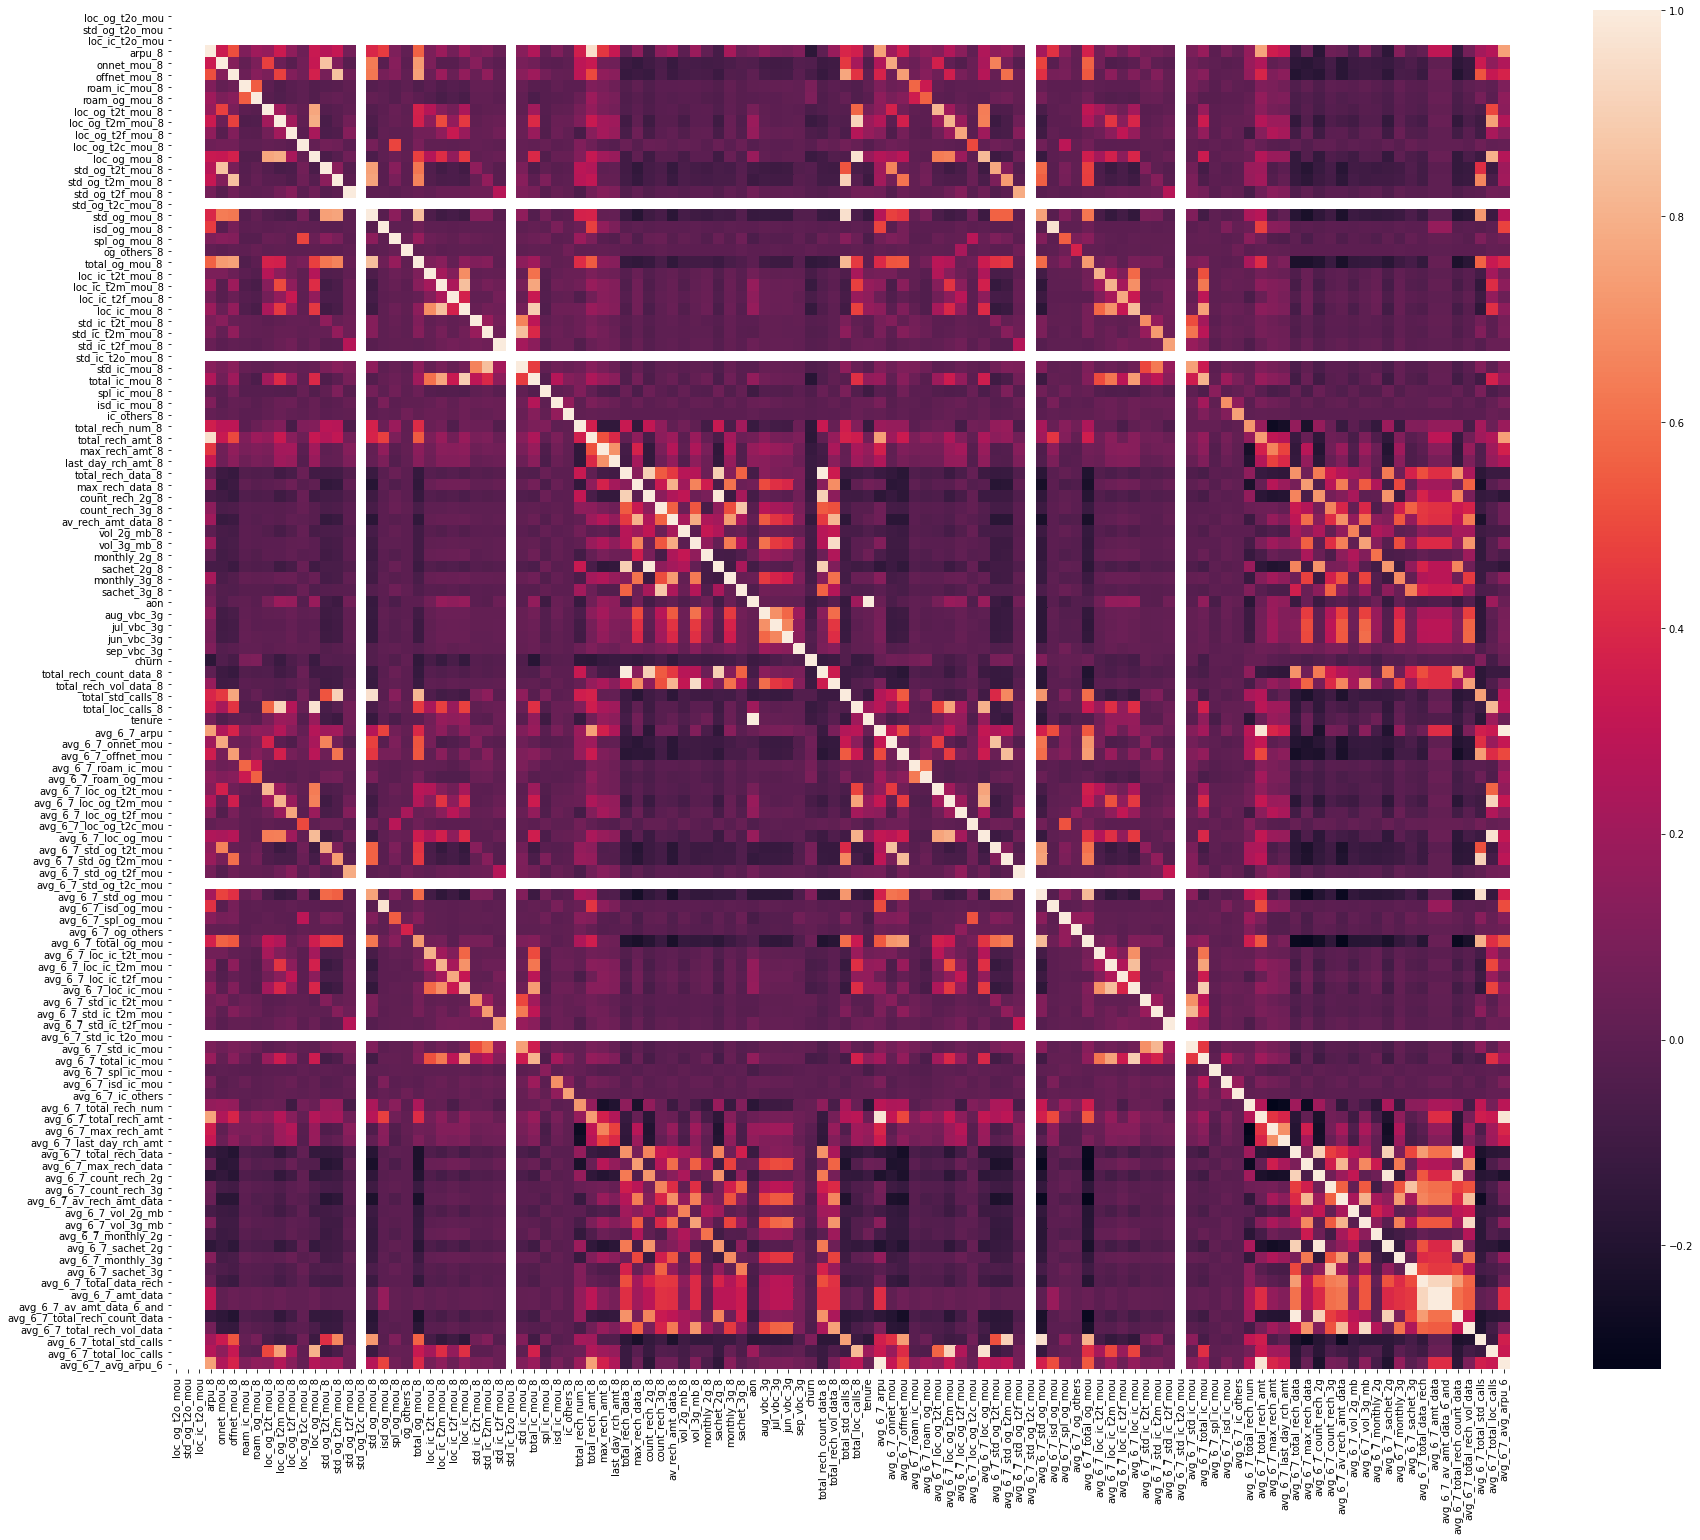


Execution Time =  10.25 seconds



In [84]:
# Let's see the correlation matrix
start_time=time.time()

plt.figure(figsize = (30,25))        # Size of the figure
sns.heatmap(df_churn_hvc_M1.corr())
plt.show()

end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")

In [85]:
# Numerical columns available
num_col = df_churn_hvc_M1.select_dtypes(include = ['int64','float64']).columns.tolist()

### Apply KNNImputer

In [86]:
# Importing the libraries for Scaling and Imputation
import time
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
df_churn_hvc_M1[num_col]=scalar.fit_transform(df_churn_hvc_M1[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer

start_time=time.time()
telecom_data_knn = pd.DataFrame(knn.fit_transform(df_churn_hvc_M1[num_col]))
telecom_data_knn.columns=df_churn_hvc_M1[num_col].columns

end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")


Execution Time =  60.08 seconds



In [87]:
# check for any null values after imputation for numerical columns
telecom_data_knn.isnull().sum().sum()

0

#### Observation:
The `KNNImputer` has replaced all the `null` values in the numerical column using K-means algorithm sucessfully.

In [88]:
# Since we sclaed the numerical columns for the purpose of handling the null values, 
#we can restore the sclaed values to its original form.

# Converting the scaled data back to the original data
df_churn_hvc_M1[num_col]=scalar.inverse_transform(telecom_data_knn)

# Checking the top 10 data
df_churn_hvc_M1.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,...,avg_6_7_monthly_3g,avg_6_7_sachet_3g,avg_6_7_total_data_rech,avg_6_7_amt_data,avg_6_7_av_amt_data_6_and,avg_6_7_total_rech_count_data,avg_6_7_total_rech_vol_data,avg_6_7_total_std_calls,avg_6_7_total_loc_calls,avg_6_7_avg_arpu_6
0,0.0,0.0,0.0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,0.0,252.0,559.0,559.0,1.0,132.890,79.463333,84.816667,206.1005
1,0.0,0.0,0.0,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,...,0.0,0.0,0.0,1185.0,1185.0,0.0,0.000,122.195000,914.675000,1209.5150
2,0.0,0.0,0.0,137.362,35.08,136.48,0.00,0.00,12.49,50.54,...,0.0,0.0,177.0,696.0,696.0,1.0,553.475,148.735000,408.905000,435.4720
3,0.0,0.0,0.0,637.760,85.14,983.39,0.00,0.00,23.34,104.81,...,0.0,0.0,0.0,640.0,640.0,0.0,0.000,1586.040000,185.810000,556.1030
4,0.0,0.0,0.0,366.966,33.58,205.89,0.00,0.00,33.58,148.56,...,1.0,0.0,356.0,583.0,583.0,1.0,299.785,8.710000,215.770000,134.1235
5,0.0,0.0,0.0,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,4.5,2.0,12854.5,14786.5,14786.5,6.5,5904.680,0.000000,0.000000,1669.9265
6,0.0,0.0,0.0,393.909,666.38,97.81,0.00,0.00,9.48,18.96,...,0.0,0.0,0.0,528.0,528.0,0.0,0.000,500.345000,73.560000,425.2725
7,0.0,0.0,0.0,229.769,80.44,136.69,0.00,0.00,80.44,107.88,...,0.0,0.0,0.0,503.0,503.0,0.0,0.000,129.570000,485.050000,454.2980
8,0.0,0.0,0.0,179.218,156.91,68.18,0.00,0.00,29.31,65.58,...,0.0,0.0,0.0,1448.5,1448.5,0.0,0.000,1210.345000,1606.805000,1224.5990
9,0.0,0.0,0.0,706.020,102.69,261.34,0.00,0.00,102.69,138.91,...,0.0,0.0,459.5,1725.0,1725.0,4.5,0.135,66.795000,548.710000,1059.6865


In [89]:
# Checking the overall missing values in the dataset
((df_churn_hvc_M1.isnull().sum()/df_churn_hvc_M1.shape[0])*100).round(2).sort_values(ascending=False)

avg_6_7_avg_arpu_6        0.0
count_rech_3g_8           0.0
std_ic_mou_8              0.0
total_ic_mou_8            0.0
spl_ic_mou_8              0.0
                         ... 
avg_6_7_loc_ic_t2m_mou    0.0
avg_6_7_loc_ic_t2f_mou    0.0
avg_6_7_loc_ic_mou        0.0
avg_6_7_std_ic_t2t_mou    0.0
loc_og_t2o_mou            0.0
Length: 116, dtype: float64

In [90]:
# Reconfirming for missing values if any
df_churn_hvc_M1.isnull().sum().sum()

0

In [91]:
# lets create X dataset for model building.
X = df_churn_hvc_M1.drop(['churn'],axis=1)

In [92]:
y=df_churn_hvc_M1['churn']
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

### Train and Test Split

In [93]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 115)
Dimension of X_test: (9001, 115)


In [94]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 4788 to 29733
Data columns (total 115 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   loc_og_t2o_mou                 float64
 1   std_og_t2o_mou                 float64
 2   loc_ic_t2o_mou                 float64
 3   arpu_8                         float64
 4   onnet_mou_8                    float64
 5   offnet_mou_8                   float64
 6   roam_ic_mou_8                  float64
 7   roam_og_mou_8                  float64
 8   loc_og_t2t_mou_8               float64
 9   loc_og_t2m_mou_8               float64
 10  loc_og_t2f_mou_8               float64
 11  loc_og_t2c_mou_8               float64
 12  loc_og_mou_8                   float64
 13  std_og_t2t_mou_8               float64
 14  std_og_t2m_mou_8               float64
 15  std_og_t2f_mou_8               float64
 16  std_og_t2c_mou_8               float64
 17  std_og_mou_8                   float64
 18  is

In [95]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

### Scaling on the dataset

In [96]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [97]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,...,avg_6_7_monthly_3g,avg_6_7_sachet_3g,avg_6_7_total_data_rech,avg_6_7_amt_data,avg_6_7_av_amt_data_6_and,avg_6_7_total_rech_count_data,avg_6_7_total_rech_vol_data,avg_6_7_total_std_calls,avg_6_7_total_loc_calls,avg_6_7_avg_arpu_6
4788,0.0,0.0,0.0,0.038904,0.000238,0.004095,0.0,0.0,0.000238,0.015246,...,0.000000,0.000000,0.006781,0.002411,0.002411,0.036697,0.003315,0.000000,0.007865,0.063393
8447,0.0,0.0,0.0,0.032921,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.037037,0.014138,0.010484,0.010484,0.119266,0.014134,0.000000,0.001752,0.068877
4535,0.0,0.0,0.0,0.033826,0.000714,0.003679,0.0,0.0,0.000714,0.014527,...,0.000000,0.000000,0.025868,0.022038,0.022038,0.128440,0.018995,0.000000,0.011986,0.071655
27580,0.0,0.0,0.0,0.081645,0.050406,0.052962,0.0,0.0,0.004439,0.012824,...,0.043478,0.000000,0.002231,0.021413,0.021413,0.009174,0.042404,0.186702,0.016499,0.153131
16891,0.0,0.0,0.0,0.042893,0.004868,0.010097,0.0,0.0,0.000682,0.034307,...,0.000000,0.000000,0.000000,0.004699,0.004699,0.000000,0.000000,0.034625,0.096976,0.094266


## Handling Data Imbalance 
Using `SMOTE` method, we can balance the data w.r.t. churn variable and proceed further

In [98]:
!pip install imblearn

In [99]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [100]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 115)
Dimension of y_train_sm Shape: (38576,)


## Feature Importance  - by Logistic Regression Model

In [101]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [102]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38484
Model Family:                Binomial   Df Model:                           91
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 25 Aug 2021   Deviance:                          nan
Time:                        23:05:43   Pearson chi2:                 4.08e+13
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.5930      0.204     -2.903      0.004      -0.993      -0.193
loc_og_t2o_mou                 1.931e-05   1.72e-06     11.217      0.000    1.59e-05    2.27e-05
std_og_t2o_mou                 5.889e-06   1.39e-06      4.233      0.000    3.16e-06    8.62e-06
loc_ic_t2o_mou                -1.501e-05   1.82e-06     -8.246      0.000   -1.86e-05   -1.14e-05
arpu_8                           23.0152      2.629      8.754      0.000      17.862      28.168
onnet_mou_8                     -26.6455     29.455     -0.905      0.366     -84.377      31.086
offnet_mou_8                    -55.7969     37.442     -1.490      0.136    -129.182      17.588
roam_ic_mou_8                    -1.1567      0.759     -1.524      0.128      -2.645       0.331
roam_og_mou_8                    16.2869      9.461      1.721      0.085      -2.257      34.831
loc_og_t2t_mou_8                2.24e+05   3.54e+04      6.333      0.000    1.55e+05    2.93e+05
loc_og_t2m_mou_8               1.042e+05   1.65e+04      6.331      0.000     7.2e+04    1.36e+05
loc_og_t2f_mou_8               2.729e+04   4309.167      6.332      0.000    1.88e+04    3.57e+04
loc_og_t2c_mou_8               3008.7536    475.706      6.325      0.000    2076.387    3941.120
loc_og_mou_8                  -1.353e+05   2.14e+04     -6.327      0.000   -1.77e+05   -9.34e+04
std_og_t2t_mou_8               2.532e+05   3.48e+04      7.269      0.000    1.85e+05    3.22e+05
std_og_t2m_mou_8               4.409e+05   6.07e+04      7.268      0.000    3.22e+05     5.6e+05
std_og_t2f_mou_8               1.633e+04   2248.273      7.263      0.000    1.19e+04    2.07e+04
std_og_t2c_mou_8               8.078e-06   8.31e-07      9.718      0.000    6.45e-06    9.71e-06
std_og_mou_8                  -4.412e+05   6.07e+04     -7.264      0.000    -5.6e+05   -3.22e+05
isd_og_mou_8                     45.1587      5.021      8.994      0.000      35.318      54.999
spl_og_mou_8                     25.2784      3.106      8.139      0.000      19.191      31.365
og_others_8                   -1549.0804    753.407     -2.056      0.040   -3025.731     -72.430
total_og_mou_8                 -329.1213     27.712    -11.876      0.000    -383.436    -274.807
loc_ic_t2t_mou_8               1.939e+05   1.24e+04     15.643      0.000     1.7e+05    2.18e+05
loc_ic_t2m_mou_8               2.137e+05   1.37e+04     15.642      0.000    1.87e+05     2.4e+05
loc_ic_t2f_mou_8               7.694e+04   4918.547     15.644      0.000    6.73e+04    8.66e+04
loc_ic_mou_8                   -2.61e+05   1.67e+04    -15.640      0.000   -2.94e+05   -2.28e+05
std_ic_t2t_mou_8               3.277e+04   1.85e+04      1.767      0.077   -3571.611    6.91e+04
std_ic_t2m_mou_8               4.296e+04   2.

### Logistic Regression using Feature Selection (RFE method)

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [104]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['roam_og_mou_8', 'loc_og_t2m_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'monthly_3g_8',
       'aug_vbc_3g', 'sep_vbc_3g', 'total_loc_calls_8', 'avg_6_7_arpu',
       'avg_6_7_loc_ic_t2m_mou', 'avg_6_7_avg_arpu_6'],
      dtype='object')


In [105]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 96),
 ('std_og_t2o_mou', False, 95),
 ('loc_ic_t2o_mou', False, 94),
 ('arpu_8', False, 27),
 ('onnet_mou_8', False, 42),
 ('offnet_mou_8', False, 39),
 ('roam_ic_mou_8', False, 43),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 33),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 57),
 ('loc_og_t2c_mou_8', False, 80),
 ('loc_og_mou_8', False, 10),
 ('std_og_t2t_mou_8', False, 87),
 ('std_og_t2m_mou_8', False, 70),
 ('std_og_t2f_mou_8', False, 11),
 ('std_og_t2c_mou_8', False, 92),
 ('std_og_mou_8', False, 66),
 ('isd_og_mou_8', False, 6),
 ('spl_og_mou_8', False, 48),
 ('og_others_8', False, 82),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 15),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 28),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 40),
 ('std_ic_t2m_mou_8', False, 45),
 ('std_ic_t2f_mou_8', False, 78),
 ('std_ic_t2o_mou_8', False, 90),
 ('std_ic_mou_8', False, 22),
 ('total_ic_mou_8',

### Prediction on train

In [106]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def Model_matrix(y_test, y_pred):  
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    print('Accuracy: ', round(accuracy,2))
    print('Recall: ', round(recall,2))
    print('Precision: ', round(precision,2))
    print('AUC: ', round(auc,2))
    print('f1: ', round(f1,2))
   


In [107]:
# Training the model 
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14817.
Date:                Wed, 25 Aug 2021   Deviance:                       29634.
Time:                        23:06:33   Pearson chi2:                 1.92e+15
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0754      0.075     -1.009      0.313      -0.222       0.071
roam_og_mou_8              6.2441      0.573     10.900      0.000       5.121       7.367
loc_og_t2m_mou_8           0.0872      1.717      0.051      0.959      -3.278       3.452
total_og_mou_8            -7.1195      0.600    -11.863      0.000      -8.296      -5.943
loc_ic_t2m_mou_8         -18.7729      2.719     -6.905      0.000     -24.102     -13.444
loc_ic_mou_8             -11.3918      2.562     -4.447      0.000     -16.413      -6.371
total_ic_mou_8           -18.7716      1.353    -13.878      0.000     -21.423     -16.121
spl_ic_mou_8             -30.9571      1.902    -16.279      0.000     -34.684     -27.230
total_rech_num_8         -10.6823      0.599    -17.824      0.000     -11.857      -9.508
total_rech_amt_8          -5.2465      1.024     -5.122      0.000      -7.254      -3.239
last_day_rch_amt_8       -16.1138      0.802    -20.101      0.000     -17.685     -14.543
total_rech_data_8        -10.4050      0.601    -17.316      0.000     -11.583      -9.227
vol_2g_mb_8               -9.8282      0.955    -10.291      0.000     -11.700      -7.956
monthly_2g_8              -6.3757      0.364    -17.537      0.000      -7.088      -5.663
monthly_3g_8              -8.0130      0.707    -11.330      0.000      -9.399      -6.627
aug_vbc_3g                -3.7834      0.550     -6.875      0.000      -4.862      -2.705
sep_vbc_3g               -59.2552      5.137    -11.536      0.000     -69.323     -49.188
total_loc_calls_8        -13.7414      2.307     -5.957      0.000     -18.263      -9.220
avg_6_7_arpu              13.0521      0.477     27.341      0.000      12.116      13.988
avg_6_7_loc_ic_t2m_mou    13.6834      0.898     15.236      0.000      11.923      15.444
avg_6_7_avg_arpu_6        13.0521      0.477     27.341      0.000      12.116      13.988
==========================================================================================
"""

In [108]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_og_t2m_mou_8' as it has high p-value of 0.9
rfe_columns_1=rfe_columns.drop('loc_og_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['roam_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'monthly_3g_8', 'aug_vbc_3g',
       'sep_vbc_3g', 'total_loc_calls_8', 'avg_6_7_arpu',
       'avg_6_7_loc_ic_t2m_mou', 'avg_6_7_avg_arpu_6'],
      dtype='object')


In [109]:
# dropping unnessesary column
rfe_columns_1=rfe_columns_1.drop('avg_6_7_avg_arpu_6',1)

In [110]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14817.
Date:                Wed, 25 Aug 2021   Deviance:                       29634.
Time:                        23:06:34   Pearson chi2:                 1.92e+15
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0755      0.075     -1.010      0.313      -0.222       0.071
roam_og_mou_8              6.2436      0.573     10.901      0.000       5.121       7.366
total_og_mou_8            -7.1218      0.599    -11.899      0.000      -8.295      -5.949
loc_ic_t2m_mou_8         -18.7336      2.606     -7.189      0.000     -23.841     -13.626
loc_ic_mou_8             -11.4228      2.488     -4.591      0.000     -16.300      -6.546
total_ic_mou_8           -18.7721      1.353    -13.879      0.000     -21.423     -16.121
spl_ic_mou_8             -30.9566      1.902    -16.279      0.000     -34.684     -27.230
total_rech_num_8         -10.6819      0.599    -17.825      0.000     -11.856      -9.507
total_rech_amt_8          -5.2445      1.024     -5.124      0.000      -7.251      -3.238
last_day_rch_amt_8       -16.1141      0.802    -20.102      0.000     -17.685     -14.543
total_rech_data_8        -10.4051      0.601    -17.316      0.000     -11.583      -9.227
vol_2g_mb_8               -9.8286      0.955    -10.292      0.000     -11.700      -7.957
monthly_2g_8              -6.3755      0.364    -17.538      0.000      -7.088      -5.663
monthly_3g_8              -8.0133      0.707    -11.331      0.000      -9.399      -6.627
aug_vbc_3g                -3.7839      0.550     -6.877      0.000      -4.862      -2.706
sep_vbc_3g               -59.2562      5.137    -11.536      0.000     -69.324     -49.189
total_loc_calls_8        -13.6344      0.935    -14.580      0.000     -15.467     -11.802
avg_6_7_arpu              26.1044      0.955     27.341      0.000      24.233      27.976
avg_6_7_loc_ic_t2m_mou    13.6848      0.898     15.244      0.000      11.925      15.444
==========================================================================================
"""

In [111]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.28748370e-01, 3.67144570e-01, 2.87681595e-01, 4.47937398e-01,
       4.23369298e-01, 3.85853791e-01, 7.62418202e-07, 4.05224673e-01,
       2.54798723e-02, 6.75969901e-01])

In [112]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.tail()

,Converted,Converted_prob
38571,1.0,0.859779
38572,1.0,0.872061
38573,1.0,0.889323
38574,1.0,0.256501
38575,1.0,0.922584


In [113]:
# Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.sample(10)

,Converted,Converted_prob,churn_pred
28873,1.0,0.619033,1
33579,1.0,0.829840,1
6077,0.0,0.287267,0
16776,0.0,0.156254,0
27275,1.0,0.914575,1
202,0.0,0.006672,0
34219,1.0,0.910184,1
9445,0.0,0.237246,0
32932,1.0,0.915720,1
31846,1.0,0.817564,1


In [114]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15827  3461]
 [ 2548 16740]]


In [115]:
# Checking the overall accuracy on train.
print("The overall accuracy of the model is:",round(metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred),2))

The overall accuracy of the model is: 0.84


In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_1].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns_1].values, i) for i in range(X_train_sm[rfe_columns_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,11.08
4,total_ic_mou_8,7.86
2,loc_ic_t2m_mou_8,6.70
7,total_rech_amt_8,6.56
6,total_rech_num_8,3.60
1,total_og_mou_8,3.52
17,avg_6_7_loc_ic_t2m_mou,3.31
16,avg_6_7_arpu,3.09
15,total_loc_calls_8,2.49
8,last_day_rch_amt_8,1.97


In [118]:
# Metrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",round((TP / float(TP+FN)),2))

# Let us calculate specificity
print("Specificity = ",round((TN / float(TN+FP)),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",round((FP/ float(TN+FP)),2))

# positive predictive value 
print ("Precision = ",round((TP / float(TP+FP)),2))

# Negative predictive value
print ("True Negative Prediction Rate = ",round((TN / float(TN+ FN)),2))


Sensitivity =  0.87
Specificity =  0.82
False Positive Rate =  0.18
Precision =  0.83
True Negative Prediction Rate =  0.86


In [120]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )


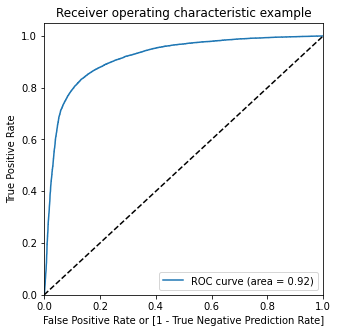

In [122]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)


In [123]:
# check area under curve
round(metrics.auc(fpr, tpr),2)

0.92

### Prediction on test dataset

In [124]:
# Making predictions on the test set
# Transforming and feature selection for test data

# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,...,avg_6_7_monthly_3g,avg_6_7_sachet_3g,avg_6_7_total_data_rech,avg_6_7_amt_data,avg_6_7_av_amt_data_6_and,avg_6_7_total_rech_count_data,avg_6_7_total_rech_vol_data,avg_6_7_total_std_calls,avg_6_7_total_loc_calls,avg_6_7_avg_arpu_6
10747,0.0,0.0,0.0,0.026143,0.000070,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005683,0.000033,0.000033,0.055046,0.005585,0.005290,0.002001,0.059622
12573,0.0,0.0,0.0,0.048190,0.002058,0.007510,0.000000,0.000000,0.002058,0.005379,...,0.043478,0.018519,0.006666,0.004312,0.004312,0.027523,0.013001,0.017464,0.007255,0.075152
29677,0.0,0.0,0.0,0.061230,0.008157,0.018789,0.000000,0.000000,0.008157,0.073716,...,0.130435,0.000000,0.011154,0.015249,0.015249,0.027523,0.036628,0.000257,0.056558,0.095894
8856,0.0,0.0,0.0,0.042998,0.000297,0.000573,0.000000,0.000000,0.000000,0.000000,...,0.086957,0.000000,0.015067,0.011933,0.011933,0.055046,0.045667,0.000491,0.009522,0.070960
21098,0.0,0.0,0.0,0.098384,0.039505,0.135335,0.000521,0.031491,0.004256,0.041749,...,0.000000,0.000000,0.000000,0.007225,0.007225,0.000000,0.000000,0.151336,0.042489,0.101081


In [125]:
# Feature selection
X_test=X_test[rfe_columns_1]
X_test.head()

,roam_og_mou_8,total_og_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,monthly_2g_8,monthly_3g_8,aug_vbc_3g,sep_vbc_3g,total_loc_calls_8,avg_6_7_arpu,avg_6_7_loc_ic_t2m_mou
10747,0.000000,0.000053,0.002466,0.002782,0.011886,0.000000,0.010204,0.000714,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.059622,0.002780
12573,0.000000,0.009067,0.005979,0.022029,0.028095,0.000000,0.020408,0.024643,0.011238,0.017544,0.004586,0.0,0.0625,0.019572,0.000000,0.005389,0.075152,0.006988
29677,0.000000,0.024987,0.180698,0.183375,0.168044,0.000000,0.035714,0.040429,0.029220,0.035088,0.056568,0.0,0.1250,0.211621,0.061556,0.054209,0.095894,0.143215
8856,0.000000,0.000800,0.000000,0.000037,0.011214,0.000000,0.025510,0.021143,0.034615,0.052632,0.008221,0.2,0.0000,0.068735,0.000000,0.000000,0.070960,0.001611
21098,0.031491,0.157573,0.068991,0.066205,0.061288,0.080257,0.061224,0.088357,0.029220,0.017544,0.000000,0.0,0.0000,0.000000,0.000000,0.030351,0.101081,0.065657


In [126]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [127]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 10747    0.751150
12573    0.406616
29677    0.000003
8856     0.179099
21098    0.004810
17458    0.166940
1476     0.002620
5120     0.829756
18338    0.763574
28280    0.603777
dtype: float64


In [128]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()


,0
10747,0.751150
12573,0.406616
29677,0.000003
8856,0.179099
21098,0.004810


In [129]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [130]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
10747,0.0
12573,0.0
29677,0.0
8856,0.0
21098,0.0


In [131]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
10747,0.0,0.751150
12573,0.0,0.406616
29677,0.0,0.000003
8856,0.0,0.179099
21098,0.0,0.004810


In [132]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
10747,0.0,0.751150,1
12573,0.0,0.406616,0
29677,0.0,0.000003,0
8856,0.0,0.179099,0
21098,0.0,0.004810,0


In [133]:
# Checking the overall accuracy of the predicted set.
round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)

0.84

In [134]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6943 1329]
 [ 145  584]]


In [135]:
# Calculating model validation parameters
TP = confusion2_test[1,1] # true positive 
TN = confusion2_test[0,0] # true negatives
FP = confusion2_test[0,1] # false positives
FN = confusion2_test[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",round((TP / float(TP+FN)),2))

# Let us calculate specificity
print("Specificity = ",round((TN / float(TN+FP)),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",round((FP/ float(TN+FP)),2))

# positive predictive value 
print ("Precision = ",round((TP / float(TP+FP)),2))

# Negative predictive value
print ("True Negative Prediction Rate = ",round((TN / float(TN+ FN)),2))

Sensitivity =  0.8
Specificity =  0.84
False Positive Rate =  0.16
Precision =  0.31
True Negative Prediction Rate =  0.98


In [137]:
Model_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)

Accuracy:  0.84
Recall:  0.8
Precision:  0.31
AUC:  0.82
f1:  0.44


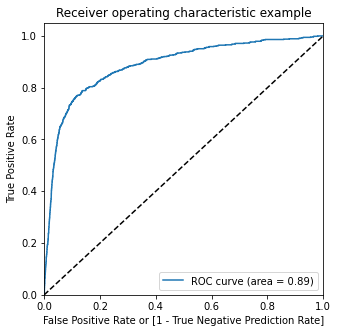

In [138]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)


In [139]:
# check area under curve
round(metrics.auc(fpr, tpr),2)

0.89

In [140]:
rfe_columns_1

Index(['roam_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'monthly_3g_8', 'aug_vbc_3g',
       'sep_vbc_3g', 'total_loc_calls_8', 'avg_6_7_arpu',
       'avg_6_7_loc_ic_t2m_mou'],
      dtype='object')

<AxesSubplot:>

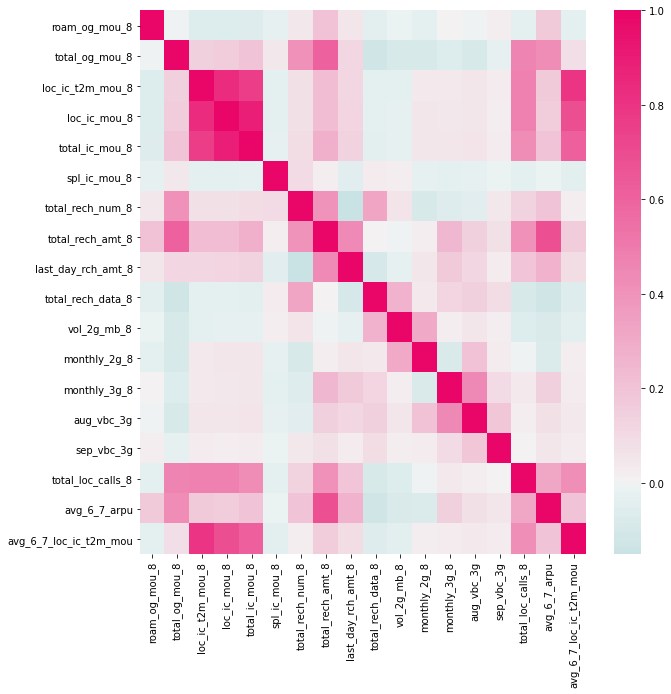

In [141]:
top_features = rfe_columns_1
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap= True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

#### Observtions:
loc_ic_t2c_mou8, loc_ic_mou_8 and total_ic_mou_8 seems to be highly correlated. 

## Feature Importance - by Decision Tree Model

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [143]:
X_train.shape, X_test.shape

((21000, 115), (9001, 115))

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=5)

In [146]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [147]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [148]:
from sklearn.metrics import classification_report

In [149]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8251
         1.0       0.76      0.50      0.60       750

    accuracy                           0.95      9001
   macro avg       0.86      0.74      0.79      9001
weighted avg       0.94      0.95      0.94      9001



In [150]:
from sklearn.metrics import plot_roc_curve

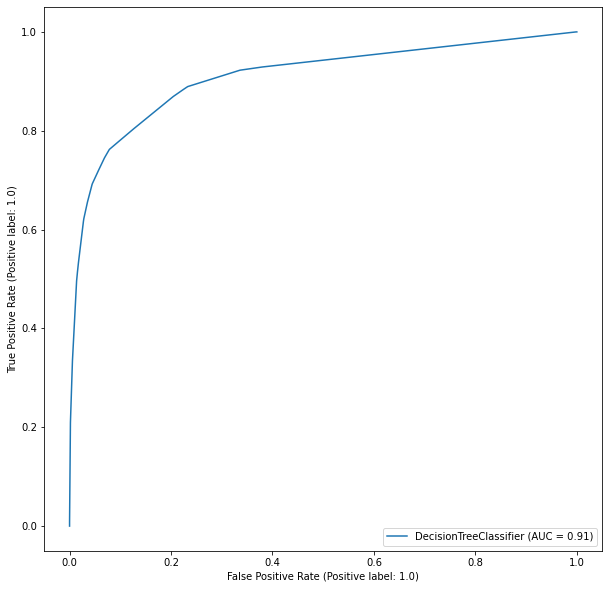

In [151]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

In [152]:
Model_matrix(y_test, y_test_pred)

Accuracy:  0.95
Recall:  0.5
Precision:  0.76
AUC:  0.74
f1:  0.6


### Hyper-parameter tuning for the Decision Tree 

In [153]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [154]:
params = {
    "max_depth": [3,5,10,20],
    "min_samples_leaf": [35,50,100,500]
}

In [155]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [156]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Wall time: 28.2 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [35, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [157]:
grid_search.best_score_

0.9436190476190476

In [158]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35, random_state=42)

In [159]:
dt_y_pred_test = dt_best.predict(X_test)

In [160]:
# View confusion matrix for test data and predictions
from sklearn import metrics
metrics.confusion_matrix(y_test, dt_y_pred_test)

array([[8113,  138],
       [ 372,  378]], dtype=int64)

In [161]:
print(classification_report(y_test, dt_y_pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      8251
         1.0       0.73      0.50      0.60       750

    accuracy                           0.94      9001
   macro avg       0.84      0.74      0.78      9001
weighted avg       0.94      0.94      0.94      9001



In [162]:
Model_matrix(y_test, dt_y_pred_test)

Accuracy:  0.94
Recall:  0.5
Precision:  0.73
AUC:  0.74
f1:  0.6


## Feature Importance - by Random Forest Model

In [163]:
from sklearn.ensemble import RandomForestClassifier


In [164]:
rf = RandomForestClassifier(n_estimators=50, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [165]:
%%time
rf.fit(X_train, y_train)


Wall time: 1.45 s


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=50,
                       oob_score=True, random_state=100)

In [166]:
rf.oob_score_

0.936047619047619

In [167]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

In [168]:
# View confusion matrix for test data and predictions
from sklearn import metrics

metrics.confusion_matrix(y_test, y_pred_test)

array([[8194,   57],
       [ 517,  233]], dtype=int64)

In [169]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8251
         1.0       0.76      0.50      0.60       750

    accuracy                           0.95      9001
   macro avg       0.86      0.74      0.79      9001
weighted avg       0.94      0.95      0.94      9001



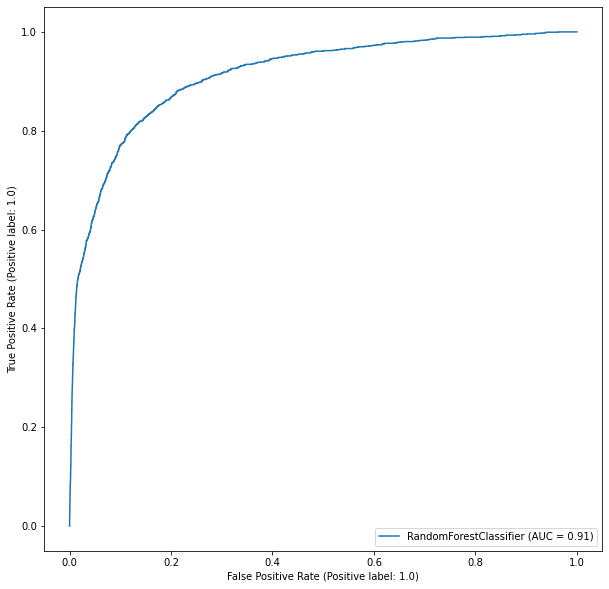

In [170]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [171]:
Model_matrix(y_test, y_pred_test)

Accuracy:  0.94
Recall:  0.31
Precision:  0.8
AUC:  0.65
f1:  0.45


### Hyper-parameter tuning for the Random Forest

In [172]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [173]:
params = {
    'max_depth': [3,5,10,20],
    'min_samples_leaf': [20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [174]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [175]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits
Wall time: 2min 37s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [176]:
grid_search.best_score_

0.9449523809523809

In [177]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_jobs=-1,
                       random_state=42)

In [178]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 50, max_depth=20, criterion='gini')


In [179]:
%%time
rfc1.fit(X_train, y_train)

Wall time: 7.64 s


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)

In [180]:
pred=rfc1.predict(X_test)

In [181]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",round(accuracy_score(y_test,pred),2))


Accuracy for Random Forest on CV data:  0.95


In [182]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8251
         1.0       0.78      0.48      0.59       750

    accuracy                           0.95      9001
   macro avg       0.87      0.73      0.78      9001
weighted avg       0.94      0.95      0.94      9001



In [183]:
Model_matrix(y_test, pred)

Accuracy:  0.95
Recall:  0.48
Precision:  0.78
AUC:  0.73
f1:  0.59


In [184]:
rf_best.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.53327888e-02,
       8.19735730e-03, 1.12832682e-02, 3.36251748e-02, 5.78678695e-02,
       1.25147141e-02, 1.54649902e-02, 1.73079955e-03, 1.46991375e-04,
       1.31673221e-02, 2.23546421e-03, 1.96770958e-03, 0.00000000e+00,
       0.00000000e+00, 2.35556893e-03, 2.10368276e-04, 7.39967793e-04,
       0.00000000e+00, 6.57238563e-02, 1.88130106e-02, 5.00428278e-02,
       2.00400617e-03, 4.73573564e-02, 2.58869844e-04, 5.99608096e-03,
       4.69769407e-04, 0.00000000e+00, 7.41248827e-03, 1.80420085e-01,
       1.23328750e-03, 2.84126945e-04, 5.32461861e-04, 1.40690500e-02,
       7.85110879e-02, 5.93715002e-02, 3.22538684e-02, 1.58443037e-02,
       1.39597143e-02, 5.13126151e-03, 2.67803618e-03, 1.76302304e-02,
       1.22292703e-02, 3.48695776e-03, 0.00000000e+00, 2.92676090e-05,
       5.60721680e-05, 0.00000000e+00, 1.50358170e-03, 3.80611257e-03,
       9.00605714e-04, 3.42400384e-04, 0.00000000e+00, 1.14659310e-02,
      

In [185]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [186]:
imp_df.sort_values(by="Imp", ascending=False).head(20)

,Varname,Imp
31,total_ic_mou_8,0.180420
3,arpu_8,0.085333
36,total_rech_amt_8,0.078511
21,total_og_mou_8,0.065724
37,max_rech_amt_8,0.059372
7,roam_og_mou_8,0.057868
23,loc_ic_t2m_mou_8,0.050043
25,loc_ic_mou_8,0.047357
6,roam_ic_mou_8,0.033625
38,last_day_rch_amt_8,0.032254


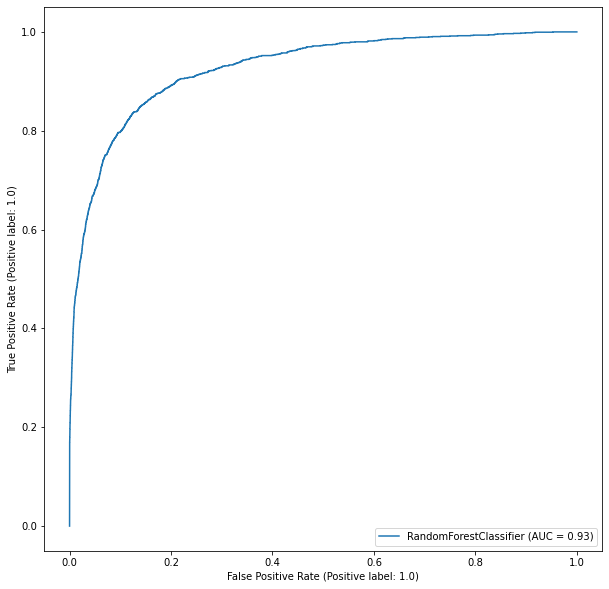

In [187]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

## SVM

In [188]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# using rbf kernel, C=1, default value of gamma
model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Wall time: 23.8 s


In [189]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[8251,    0],
       [ 744,    6]], dtype=int64)

In [190]:
Model_matrix(y_test, y_pred)

Accuracy:  0.92
Recall:  0.01
Precision:  1.0
AUC:  0.5
f1:  0.02


---
## ML Predections 
- Logistic regressinon using PCA
- XGBoost using PCA

## Logistic regressinon using PCA

In [191]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 115)
Dimension of X_test: (9001, 115)
Dimension of X_train_sm Shape: (38576, 115)
Dimension of y_train_sm Shape: (38576,)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,...,avg_6_7_monthly_3g,avg_6_7_sachet_3g,avg_6_7_total_data_rech,avg_6_7_amt_data,avg_6_7_av_amt_data_6_and,avg_6_7_total_rech_count_data,avg_6_7_total_rech_vol_data,avg_6_7_total_std_calls,avg_6_7_total_loc_calls,avg_6_7_avg_arpu_6
0,0.0,0.0,0.0,0.038904,0.000238,0.004095,0.0,0.0,0.000238,0.015246,...,0.000000,0.000000,0.006781,0.002411,0.002411,0.036697,0.003315,0.000000,0.007865,0.063393
1,0.0,0.0,0.0,0.032921,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.037037,0.014138,0.010484,0.010484,0.119266,0.014134,0.000000,0.001752,0.068877
2,0.0,0.0,0.0,0.033826,0.000714,0.003679,0.0,0.0,0.000714,0.014527,...,0.000000,0.000000,0.025868,0.022038,0.022038,0.128440,0.018995,0.000000,0.011986,0.071655
3,0.0,0.0,0.0,0.081645,0.050406,0.052962,0.0,0.0,0.004439,0.012824,...,0.043478,0.000000,0.002231,0.021413,0.021413,0.009174,0.042404,0.186702,0.016499,0.153131
4,0.0,0.0,0.0,0.042893,0.004868,0.010097,0.0,0.0,0.000682,0.034307,...,0.000000,0.000000,0.000000,0.004699,0.004699,0.000000,0.000000,0.034625,0.096976,0.094266


In [192]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [193]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 115)
Dimension of X_test_pca:  (9001, 115)


In [194]:
#Viewing the PCA components
pca.components_

array([[ 7.24530003e-19, -4.44089210e-16,  1.11022302e-16, ...,
        -4.06872145e-02,  4.96004569e-02,  4.12373256e-03],
       [-8.65680516e-19, -1.66533454e-16, -5.55111512e-17, ...,
         2.84387102e-01,  8.29605813e-02,  7.84209377e-02],
       [-5.66293183e-20,  5.20417043e-17,  3.19189120e-16, ...,
        -4.18816588e-02,  2.74150207e-01,  6.47153296e-02],
       ...,
       [-0.00000000e+00, -2.61411445e-02, -1.79152816e-02, ...,
        -5.50415682e-04, -6.17248592e-05,  7.60266777e-03],
       [ 0.00000000e+00,  7.63436873e-16,  5.90022412e-16, ...,
         2.19366918e-16,  1.36547845e-16, -1.09510500e-16],
       [ 9.99997949e-01, -1.52920911e-03,  1.28646029e-03, ...,
         7.78702142e-05,  3.70745659e-05,  3.81351739e-05]])

In [195]:
# Performing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [196]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6747 1525]
 [ 130  599]] 

Accuracy of the logistic regression model with PCA:  0.8161315409398956


In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      8272
         1.0       0.28      0.82      0.42       729

    accuracy                           0.82      9001
   macro avg       0.63      0.82      0.66      9001
weighted avg       0.92      0.82      0.85      9001



In [198]:
# Looking at the explained variance ratio for each component

pca.explained_variance_ratio_

array([3.70307897e-01, 1.19143193e-01, 7.63556128e-02, 6.77142563e-02,
       5.53511658e-02, 4.33024291e-02, 3.22547153e-02, 2.19975601e-02,
       2.05834461e-02, 1.70220574e-02, 1.52534451e-02, 1.36397814e-02,
       1.20863479e-02, 1.03345720e-02, 9.37571991e-03, 8.28381612e-03,
       7.86602098e-03, 7.27559325e-03, 6.80249655e-03, 6.70677433e-03,
       4.54185819e-03, 4.41951289e-03, 4.27726527e-03, 4.13853646e-03,
       4.10406671e-03, 3.94901389e-03, 3.40168157e-03, 3.27750949e-03,
       3.12307355e-03, 2.92820464e-03, 2.79465990e-03, 2.50267973e-03,
       2.37611467e-03, 2.31324352e-03, 1.97193456e-03, 1.84460501e-03,
       1.79887383e-03, 1.72909560e-03, 1.68091800e-03, 1.63523568e-03,
       1.31923332e-03, 1.26541549e-03, 1.17303779e-03, 1.06295180e-03,
       1.03171007e-03, 9.99423814e-04, 9.40273585e-04, 9.11161376e-04,
       8.81386894e-04, 8.29785913e-04, 8.08033338e-04, 7.11669093e-04,
       6.85598191e-04, 6.43179179e-04, 6.32425249e-04, 5.79447236e-04,
      

In [199]:
# Making a scree plot for the explained variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)

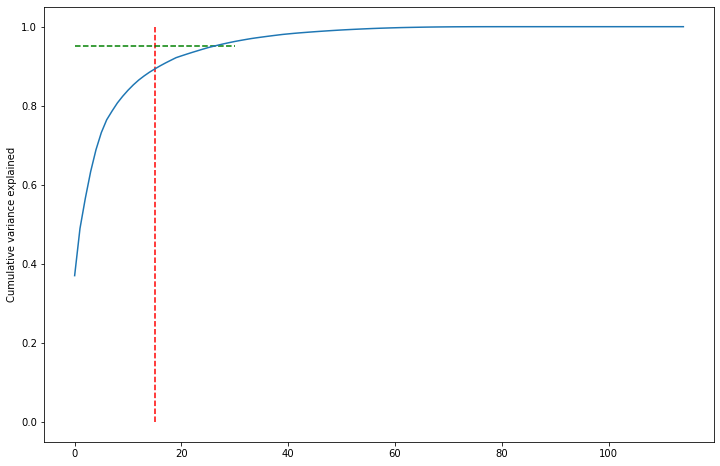

In [200]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [201]:
# Perform PCA with 16 components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 16)

In [202]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [203]:
corrmat.shape

(16, 16)

<AxesSubplot:>

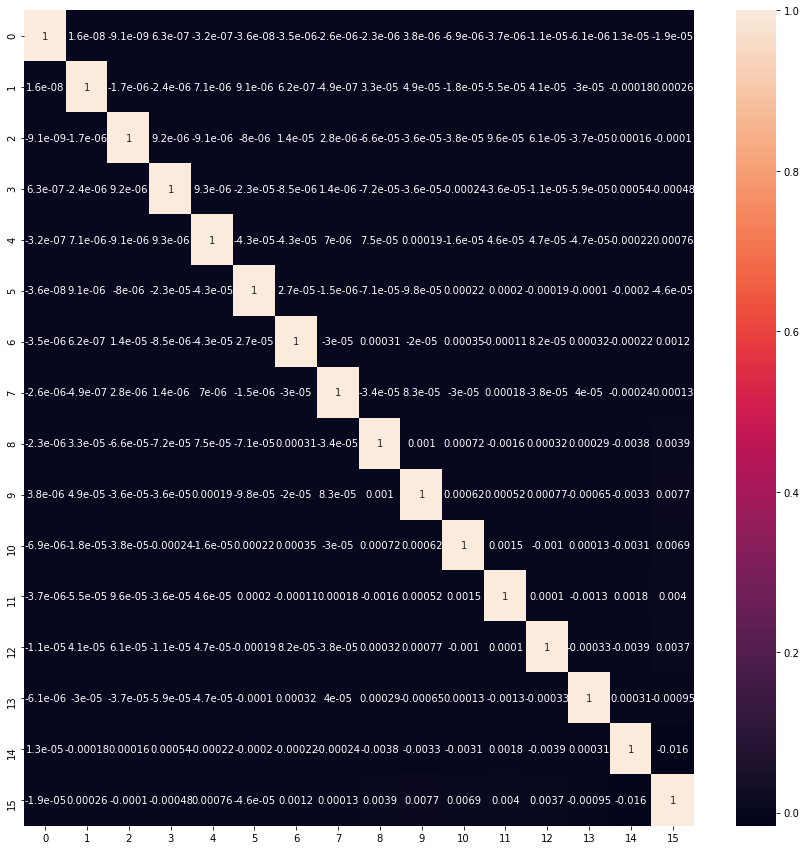

In [204]:
# Plotting the heatmap of the corr matrix

plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [205]:
Model_matrix(y_test, y_pred)

Accuracy:  0.82
Recall:  0.82
Precision:  0.28
AUC:  0.82
f1:  0.42


## XGBoost using PCA

In [206]:
!pip install xgboost

In [207]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [208]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [209]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [210]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 115)
Dimension of X_test_pca:  (9001, 115)


In [211]:
# Fit the model to our train and target
xgb_cfl.fit(X_train_sm_pca, y_train_sm)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test_pca)

[23:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [212]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,xgb_predictions),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,xgb_predictions))

Confusion Matirx for y_test & y_pred
 [[7822  450]
 [ 292  437]] 

Accuracy of the logistic regression model with PCA:  0.9175647150316631


In [213]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test_pca)
xgb_predictions_prob

array([[4.3698472e-01, 5.6301528e-01],
       [9.8442566e-01, 1.5574337e-02],
       [9.9998456e-01, 1.5467049e-05],
       ...,
       [9.9879009e-01, 1.2099048e-03],
       [9.9997830e-01, 2.1682796e-05],
       [9.9999094e-01, 9.0813837e-06]], dtype=float32)

In [214]:
xgb_predictions_prob.shape

(9001, 2)

In [215]:
accuracy_score(y_test, xgb_predictions)

0.9175647150316631

In [216]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      8272
         1.0       0.49      0.60      0.54       729

    accuracy                           0.92      9001
   macro avg       0.73      0.77      0.75      9001
weighted avg       0.93      0.92      0.92      9001



In [217]:
Model_matrix(y_test, xgb_predictions)

Accuracy:  0.92
Recall:  0.6
Precision:  0.49
AUC:  0.77
f1:  0.54


---
##  Summary

### Recommend strategies & observations to manage customer churn:


- Below are the most important features in determining churn prediction -   
    i.e. `total_ic_mou_8`, `total_rech_amt_8`, `total_og_mou_8`,`arpu_8`, `roam_og_mou_8`
    - `Incoming Call`, `Outgoing Calls`, `Recharge amount`, `Average revenue per user` and `Outgoing Calls on romaing` for `8th month` are the top 5 strong indicators of churn behaviour.

- STD, Local and 2G/3G data Usage reduced on 8th month for churn customer. So 2G/3G Voice and data services performance need to check on those areas. 

- The company needs to focus on the STD rates. Perhaps, the rates are too high. Provide customers with budgeted STD packages.

- Customers with less than `2 years` of tenure are more likely to `churn` and Business should concentrate more on that segment by rolling out new schemes to that group of customers.

---


### Predections - Various Model Insights


#### Summary matrix for all models in Test are shown below-

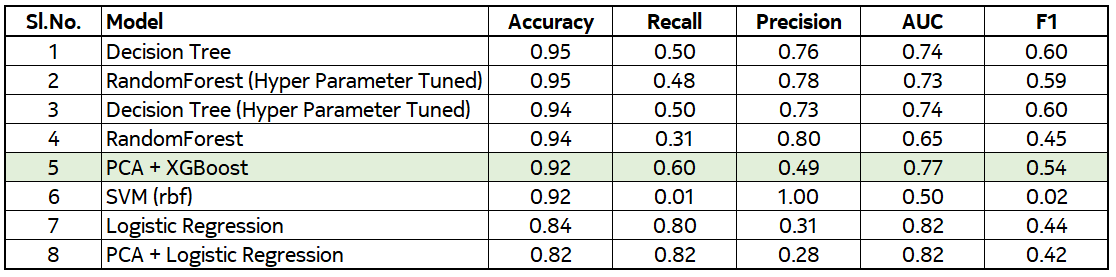

---
1. Random forest with tuned hyperparameters produce best result on this dataset with `0.95` accuracy.

2. Decision Tree also produce good accuracy with `0.94` (tuned hyperparameter) and `0.95` with default overfit model.

3. PCA with XGBoost produces best for all matrices i.e. `0.92` as Accuracy, `0.60` as Recall and `0.49` as Precision.

4. As per our analysis `PCA with XGBoost` and `Random forest` produce best matrices and models can be selected to predict churn data for future dataset.

---

                            ######### End - Thanks #########